Access to Google Drive and load dataset
You need to create a shortcut in your Drive home to this folder:

## Access to Google Drive and load dataset


In [1]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv('/content/drive/MyDrive/ee488/IMU_Gesture/data_20240531/data_cy.csv', names=['gesture','id','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy', 'AEz', 'GEx', 'GEy', 'GEz'])
df2=pd.read_csv('/content/drive/MyDrive/ee488/IMU_Gesture/data_20240531/data_sy.csv', names=['gesture','id','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy', 'AEz', 'GEx', 'GEy', 'GEz'])
df3=pd.read_csv('/content/drive/MyDrive/ee488/IMU_Gesture/data_20240531/data_mj.csv', names=['gesture','id','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy', 'AEz', 'GEx', 'GEy', 'GEz'])
df4=pd.read_csv('/content/drive/MyDrive/ee488/IMU_Gesture/data_20240531/data_dh.csv', names=['gesture','id','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy', 'AEz', 'GEx', 'GEy', 'GEz'])
df5=pd.read_csv('/content/drive/MyDrive/ee488/IMU_Gesture/data_20240531/data_jh.csv', names=['gesture','id','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy', 'AEz', 'GEx', 'GEy', 'GEz'])


In [4]:
df1['user'] = 'cy'
df2['user'] = 'sy'
df3['user'] = 'mj'
df4['user'] = 'dh'
df5['user'] = 'jh'

In [5]:
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
length = list()
for user in ['cy', 'sy', 'mj', 'dh', 'jh']:
  for gesture in df['gesture'].unique():
    for id_ in df['id'].unique():
      a = len(df[(df['user'] == user) & (df['gesture'] == gesture) & (df['id'] == id_)])
      length.append(a)
      if a < 75 or a > 76:
        print(user, gesture, id_, a)

cy 5 89 74
cy 5 90 77
sy 0 1 152
sy 0 2 150
sy 0 3 150
sy 0 4 151
sy 0 5 151
sy 0 6 151
sy 0 7 151
sy 0 8 150
sy 0 9 150
sy 0 10 150
sy 0 11 152
sy 0 12 151
sy 0 13 152
sy 0 14 151
sy 0 15 152
sy 0 16 152
sy 0 17 152
sy 0 18 150
sy 0 19 151
sy 0 20 151
sy 0 21 151
sy 0 22 151
sy 0 23 150
sy 0 24 151
sy 0 25 152
sy 0 26 114
sy 3 1 150
sy 3 2 150
sy 3 3 150
sy 3 4 150
sy 3 5 150
sy 3 6 150
sy 3 7 150
sy 3 8 149
mj 2 19 65
mj 2 20 65
mj 2 21 65
mj 2 22 65
mj 2 23 65
mj 2 25 65
mj 2 26 65
mj 2 27 74
mj 2 28 65
mj 2 30 65
mj 2 31 65
mj 2 32 66
mj 2 33 56
mj 2 34 65
mj 2 36 65
mj 2 39 60
mj 2 46 65
mj 2 47 66
mj 2 49 65
mj 2 53 50
mj 2 64 65
mj 2 67 65
mj 2 69 44
mj 2 70 2
mj 2 71 36
mj 2 72 65
mj 2 76 74
mj 2 89 65
mj 2 93 65
mj 2 94 65
mj 2 98 65
dh 6 84 77
jh 0 1 74
jh 0 2 74
jh 0 3 74
jh 0 4 74
jh 0 5 74
jh 0 6 74
jh 0 7 73
jh 0 8 74
jh 0 9 74
jh 0 10 74
jh 0 11 74
jh 0 12 74
jh 0 13 74
jh 0 14 74
jh 0 15 74
jh 0 16 74
jh 0 17 74
jh 0 18 74
jh 0 19 74
jh 0 20 74
jh 0 21 74
jh 0 22 74
jh 

In [7]:
pd.value_counts(length)

75     2033
76      699
74      696
65       21
150      14
151      11
152       7
73        7
77        2
66        2
114       1
149       1
56        1
60        1
50        1
44        1
2         1
36        1
Name: count, dtype: int64

In [8]:
dfs = list()
unique_id = 1
for user in df['user'].unique():
  for gesture in df['gesture'].unique():
    for id_ in df['id'].unique():
      df_segment = df[(df['user'] == user) & (df['gesture'] == gesture) & (df['id'] == id_)]
      if len(df_segment) == 74:
        df_segment = pd.concat([df_segment, df_segment.iloc[-1:]], axis=0)
        df_segment['unique_id'] = unique_id
        unique_id += 1
        dfs.append(df_segment)
      elif len(df_segment) == 73:
        df_segment = pd.concat([df_segment.iloc[0:1], df_segment, df_segment.iloc[-1:]], axis=0)
        df_segment['unique_id'] = unique_id
        unique_id += 1
        dfs.append(df_segment)
      elif len(df_segment) < 73:
        pass
      else:
        df_segment = df_segment.iloc[0:75]
        df_segment['unique_id'] = unique_id
        unique_id += 1
        dfs.append(df_segment)

In [9]:
df_old = df
df = pd.concat(dfs, axis=0)

In [10]:
df.shape

(260325, 16)

In [11]:
260325 / 75

3471.0

In [12]:
pd.value_counts(length)

75     2033
76      699
74      696
65       21
150      14
151      11
152       7
73        7
77        2
66        2
114       1
149       1
56        1
60        1
50        1
44        1
2         1
36        1
Name: count, dtype: int64

## Dataset Information

In [13]:
max(df['unique_id'])

3471

In [14]:
df.columns

Index(['gesture', 'id', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'AEx', 'AEy',
       'AEz', 'GEx', 'GEy', 'GEz', 'user', 'unique_id'],
      dtype='object')

In [15]:
# Column name Setup
GESTURE_COL = 'gesture'
# TIME_COL = 'Tiempo'

IMU_COLUMNS = [
    'Ax',
    'Ay',
    'Az',
    'Gx',
    'Gy',
    'Gz',
    'AEx',
    'AEy',
    'AEz',
    'GEx',
    'GEy',
    'GEz',
]

IMU = ['', 'E']
SENSOR = ['A', 'G']
AXIS = ['x', 'y', 'z']

In [16]:
GESTURE_VALUES = df[GESTURE_COL].unique()

In [17]:
# Data information (rows and columns)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 260325 entries, 0 to 51792
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gesture    260325 non-null  int64  
 1   id         260325 non-null  int64  
 2   Ax         260325 non-null  float64
 3   Ay         260325 non-null  float64
 4   Az         260325 non-null  float64
 5   Gx         260325 non-null  float64
 6   Gy         260325 non-null  float64
 7   Gz         260325 non-null  float64
 8   AEx        260324 non-null  float64
 9   AEy        260324 non-null  float64
 10  AEz        260324 non-null  float64
 11  GEx        260325 non-null  float64
 12  GEy        260325 non-null  float64
 13  GEz        260325 non-null  float64
 14  user       260325 non-null  object 
 15  unique_id  260325 non-null  int64  
dtypes: float64(12), int64(3), object(1)
memory usage: 33.8+ MB


(260325, 16)

## Preprocessing
- Breaking the dataframe into a training and test dataset.
- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- Hot encoding the activity names.

In [18]:
# handle missing value
df = df.fillna(method='ffill')

In [19]:
df.shape

(260325, 16)

In [20]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(1, 3472), test_size=0.2, shuffle=True, random_state=7317)

In [21]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df[df['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df[df['unique_id'] == test_id])

In [22]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [23]:
df_train.shape, df_test.shape

((208200, 16), (52125, 16))

In [24]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.09188928914505284 0.27918700026123083
-0.010937896253602305 0.16237554396106005
0.9294043707973104 0.3014870384791123
0.5114332853025936 37.809284184568206
0.2829411623439001 95.72956135970946
-0.31483885686839586 23.411161467952585
0.11876109510086454 0.48686742814469935
-0.5355396733909702 0.33571267449846676
-0.6793276176753122 0.47743214018159524
2.958989000960614 94.68613190402625
2.5286330451488954 109.26055642679748
0.19222094140249765 64.50730201721385


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,...,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00,208200.00
mean,2.99,50.72,-0.09,-0.01,0.93,0.51,0.28,-0.31,0.12,-0.54,...,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,2.00,29.08,0.28,0.16,0.30,37.81,95.73,23.41,0.49,0.34,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-3.03,-1.85,-1.81,-401.31,-942.69,-260.13,-4.00,-4.00,...,-9.09,-10.63,-9.85,-11.10,-8.46,-10.32,-6.96,-12.83,-9.81,-18.79
25%,1.00,25.00,-0.21,-0.11,0.96,-3.72,-6.35,-2.69,-0.11,-0.70,...,0.10,-0.11,-0.07,-0.10,-0.47,-0.49,-0.38,-0.12,-0.12,-0.14
50%,3.00,51.00,-0.08,-0.04,1.00,0.49,0.06,0.00,0.12,-0.57,...,0.23,-0.00,-0.00,0.01,0.00,-0.10,-0.15,-0.01,-0.01,-0.03
75%,5.00,76.00,0.07,0.06,1.01,4.76,5.19,2.08,0.33,-0.39,...,0.27,0.11,0.05,0.10,0.43,0.43,0.19,0.12,0.09,0.11
max,6.00,100.00,3.70,1.34,3.72,476.26,1032.65,285.16,4.00,4.00,...,9.26,12.58,10.78,12.19,7.97,13.51,9.80,10.42,13.52,10.92


In [25]:
meanscale_by_col

{'Ax': [-0.09188928914505284, 0.27918700026123083],
 'Ay': [-0.010937896253602305, 0.16237554396106005],
 'Az': [0.9294043707973104, 0.3014870384791123],
 'Gx': [0.5114332853025936, 37.809284184568206],
 'Gy': [0.2829411623439001, 95.72956135970946],
 'Gz': [-0.31483885686839586, 23.411161467952585],
 'AEx': [0.11876109510086454, 0.48686742814469935],
 'AEy': [-0.5355396733909702, 0.33571267449846676],
 'AEz': [-0.6793276176753122, 0.47743214018159524],
 'GEx': [2.958989000960614, 94.68613190402625],
 'GEy': [2.5286330451488954, 109.26055642679748],
 'GEz': [0.19222094140249765, 64.50730201721385]}

In [26]:
# Save standard scaler as json
import json

data = {
    "name": "John",
    "age": 30,
    "city": "New York",
    "is_student": False,
    "courses": ["Math", "Science", "English"]
}
path = '/content/drive/MyDrive/ee488/IMU_Gesture/models/standard_scaler6.json'

def save_dict_to_json(dictionary, filename):
    with open(filename, 'w') as json_file:
        json.dump(dictionary, json_file, indent=4)


save_dict_to_json(meanscale_by_col, path)

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [27]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [28]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[ 7.84036833e-02,  5.77609307e-03,  2.67327012e-01,
         -1.82873942e-02, -1.03029211e-01, -4.37894183e-02,
         -2.43929021e-01, -4.30309421e-01, -1.06135256e-01,
         -6.74849620e-03, -2.98244229e-02,  3.68607973e-03],
        [-6.48694633e-02,  6.73617220e-02,  2.67327012e-01,
         -1.67004824e-02, -9.54035622e-02, -7.53982730e-02,
         -2.64468493e-01, -4.60096798e-01, -8.51898708e-02,
         -8.64951376e-03,  1.93241461e-02, -7.67699282e-02],
        [-1.00687750e-01,  5.77609307e-03,  2.34158090e-01,
          5.78076839e-03, -3.54429824e-02, -7.53982730e-02,
         -3.46626382e-01, -4.60096798e-01, -8.51898708e-02,
         -2.84084898e-03,  2.32596926e-02, -9.84728975e-02],
        [ 4.25853966e-02,  5.77609307e-03,  2.67327012e-01,
          1.39798128e-02,  3.41648737e-03, -5.70309655e-02,
         -3.26086910e-01, -4.60096798e-01, -1.06135256e-01,
         -2.84084898e-03,  5.32092252e-03, -6.15778496e-02],
        [ 1.14221970e-01,  5.7760930

In [29]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-4.94688903e-01,  6.83218011e-01,  1.34651325e-01,
         -3.12471741e-02, -3.16823886e-02, -1.00448303e-02,
         -1.41231660e-01,  4.93099266e-01, -5.04097571e-01,
         -3.70591652e-02, -2.87261309e-02, -2.37526744e-02],
        [-4.58870616e-01,  6.83218011e-01,  1.67820247e-01,
         -3.44209977e-02, -3.23091542e-02, -1.51705905e-02,
         -1.20692188e-01,  4.93099266e-01, -5.25042956e-01,
         -4.28678299e-02, -3.03735690e-02, -1.81719108e-02],
        [-4.94688903e-01,  6.83218011e-01,  1.67820247e-01,
         -3.12471741e-02, -3.03243964e-02,  1.34482374e-02,
         -7.96132435e-02,  4.93099266e-01, -5.04097571e-01,
         -5.18448573e-02, -3.09227150e-02, -1.52265079e-02],
        [-5.66325476e-01,  7.44803640e-01,  1.67820247e-01,
         -3.74070254e-03, -1.38195678e-02,  1.60111175e-02,
         -1.00152716e-01,  4.93099266e-01, -5.04097571e-01,
         -4.28678299e-02, -1.70110157e-02, -2.76282046e-02],
        [-5.30507190e-01,  7.4480364

In [30]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2776, 75, 12), (695, 75, 12))

In [31]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [32]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [33]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [34]:
Y_train_valid.shape, Y_test.shape

((2776, 7), (695, 7))

## Architectures

### Architecture 1: Conv1D(32) + Conv1D(32) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 32 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape, Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.optimizers import Adam

def create_model(n_timesteps, n_features, n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a 1D Convolutional layer with 64 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add a Flatten layer
  model.add(Flatten())

  # Add a fully connected layer
  model.add(Dense(units=50, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  return model

In [ ]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.2, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 1344    X valid length: 336
y train length: 1344    y valid length: 336
n_timesteps: 72, n_features: 12, n_outputs: 7
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 69, 32)            1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 66, 32)            4128      
                                                                 
 dropout_3 (Dropout)         (None, 66, 32)            0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 33, 32)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1056)              0         
                                                    

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
42/42 [==============================] - 2s 15ms/step - loss: 1.8791 - accuracy: 0.2515 - val_loss: 1.7121 - val_accuracy: 0.4405
Epoch 2/200
42/42 [==============================] - 0s 9ms/step - loss: 1.5366 - accuracy: 0.4658 - val_loss: 1.4727 - val_accuracy: 0.6637
Epoch 3/200
42/42 [==============================] - 0s 10ms/step - loss: 1.2578 - accuracy: 0.6168 - val_loss: 1.2444 - val_accuracy: 0.7440
Epoch 4/200
42/42 [==============================] - 0s 8ms/step - loss: 1.0111 - accuracy: 0.7336 - val_loss: 1.0319 - val_accuracy: 0.8185
Epoch 5/200
42/42 [==============================] - 0s 10ms/step - loss: 0.7954 - accuracy: 0.8065 - val_loss: 0.8570 - val_accuracy: 0.8720
Epoch 6/200
42/42 [==============================] - 0s 9ms/step - loss: 0.6524 - accuracy: 0.8490 - val_loss: 0.7112 - val_accuracy: 0.8958
Epoch 7/200
42/42 [==============================] - 0s 9ms/step - loss: 0.5287 - accuracy: 0.8869 - val_loss: 0.6028 - val_accuracy: 0.9107
Epoch 8/20

In [36]:
import matplotlib.pyplot as plt

def plot_history(history):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    # 손실(loss) 그래프
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # 정확도(accuracy) 그래프
    axes[1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title('Model Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

# plot_history(history)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

14/14 [==============================] - 0s 3ms/step
test_acc : 0.9714285714285714
test_loss : 0.16376058059054893
precision : 0.9715215006445054
recall : 0.9714285714285714
f1score : 0.9714352211869738



### Architecture 2: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

In [ ]:
def create_model(n_timesteps, n_features, n_outputs):
  model = Sequential()
  # RNN layer
  model.add(LSTM(units = 64, input_shape = (n_timesteps, n_features)))
  # Dropout layer
  model.add(Dropout(0.5))
  # Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
  # Softmax layer
  model.add(Dense(n_outputs, activation = 'softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

  return model

In [ ]:
model = create_model(n_timesteps,n_features,n_outputs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                19712     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 24327 (95.03 KB)
Trainable params: 24327 (95.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
42/42 [==============================] - 7s 46ms/step - loss: 1.9740 - accuracy: 0.1101 - val_loss: 1.9500 - val_accuracy: 0.1548
Epoch 2/200
42/42 [==============================] - 1s 28ms/step - loss: 1.9521 - accuracy: 0.1763 - val_loss: 1.9242 - val_accuracy: 0.1905
Epoch 3/200
42/42 [==============================] - 1s 28ms/step - loss: 1.9244 - accuracy: 0.2269 - val_loss: 1.8999 - val_accuracy: 0.2768
Epoch 4/200
42/42 [==============================] - 1s 29ms/step - loss: 1.9055 - accuracy: 0.2582 - val_loss: 1.8726 - val_accuracy: 0.4137
Epoch 5/200
42/42 [==============================] - 1s 28ms/step - loss: 1.8775 - accuracy: 0.2924 - val_loss: 1.8404 - val_accuracy: 0.4167
Epoch 6/200
42/42 [==============================] - 1s 28ms/step - loss: 1.8449 - accuracy: 0.3423 - val_loss: 1.7994 - val_accuracy: 0.4256
Epoch 7/200
42/42 [==============================] - 1s 29ms/step - loss: 1.7890 - accuracy: 0.3824 - val_loss: 1.7378 - val_accuracy: 0.4107
Epoch 

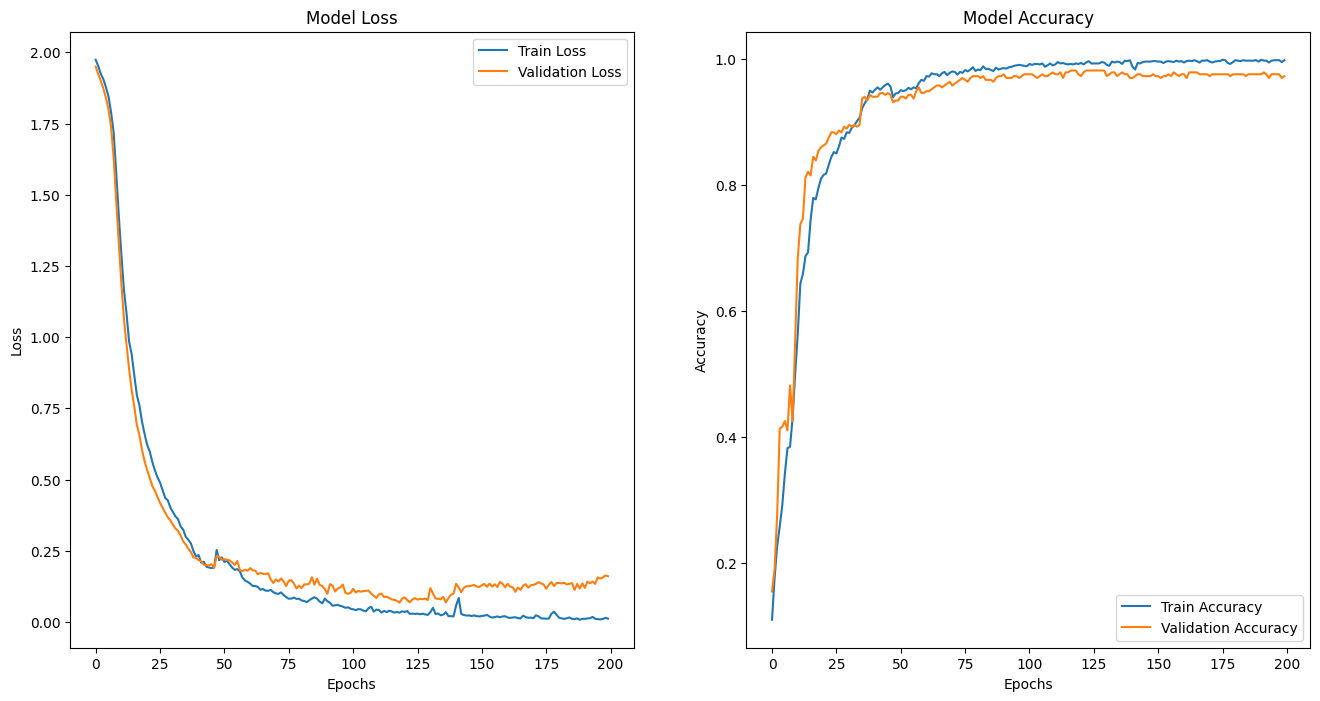

In [ ]:
plot_history(history)

In [ ]:
# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

14/14 [==============================] - 0s 24ms/step
test_acc : 0.9666666666666667
test_loss : 0.15904596975729118
precision : 0.9683029093425989
recall : 0.9666666666666667
f1score : 0.9658296350295624



In [37]:
from tensorflow.keras.optimizers import Adam

def create_model(n_timesteps, n_features, n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 4
  model.add(Conv2D(filters=32, kernel_size=(4, 1), activation='relu', input_shape=(n_timesteps,n_features, 1)))

  # Add a 1D Convolutional layer with 64 filters and a kernel size of 4
  model.add(Conv2D(filters=32, kernel_size=(4, 1), activation='relu', input_shape=(n_timesteps,n_features, 1)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling2D(pool_size=(2, 1)))

  # Add a Flatten layer
  model.add(Flatten())

  # # Add a fully connected layer
  # model.add(Dense(units=50, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  return model

In [38]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.2, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2220    X valid length: 556
y train length: 2220    y valid length: 556
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 12, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 12, 32)        4128      
                                                                 
 dropout (Dropout)           (None, 69, 12, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 13056)             0         
                                                      

In [39]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [40]:
X_train.shape, X_valid.shape, X_test.shape

((2220, 75, 12, 1), (556, 75, 12, 1), (695, 75, 12, 1))

In [41]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
70/70 [==============================] - 9s 103ms/step - loss: 1.2433 - accuracy: 0.6270 - val_loss: 0.9261 - val_accuracy: 0.8381
Epoch 2/100
70/70 [==============================] - 5s 65ms/step - loss: 0.5172 - accuracy: 0.8824 - val_loss: 0.5562 - val_accuracy: 0.8831
Epoch 3/100
70/70 [==============================] - 4s 54ms/step - loss: 0.3092 - accuracy: 0.9248 - val_loss: 0.4200 - val_accuracy: 0.8885
Epoch 4/100
70/70 [==============================] - 4s 55ms/step - loss: 0.2259 - accuracy: 0.9387 - val_loss: 0.3616 - val_accuracy: 0.9083
Epoch 5/100
70/70 [==============================] - 6s 85ms/step - loss: 0.1800 - accuracy: 0.9491 - val_loss: 0.3222 - val_accuracy: 0.9137
Epoch 6/100
70/70 [==============================] - 4s 54ms/step - loss: 0.1568 - accuracy: 0.9590 - val_loss: 0.2942 - val_accuracy: 0.9065
Epoch 7/100
70/70 [==============================] - 4s 52ms/step - loss: 0.1344 - accuracy: 0.9604 - val_loss: 0.2717 - val_accuracy: 0.9173
Epoch

KeyboardInterrupt: 

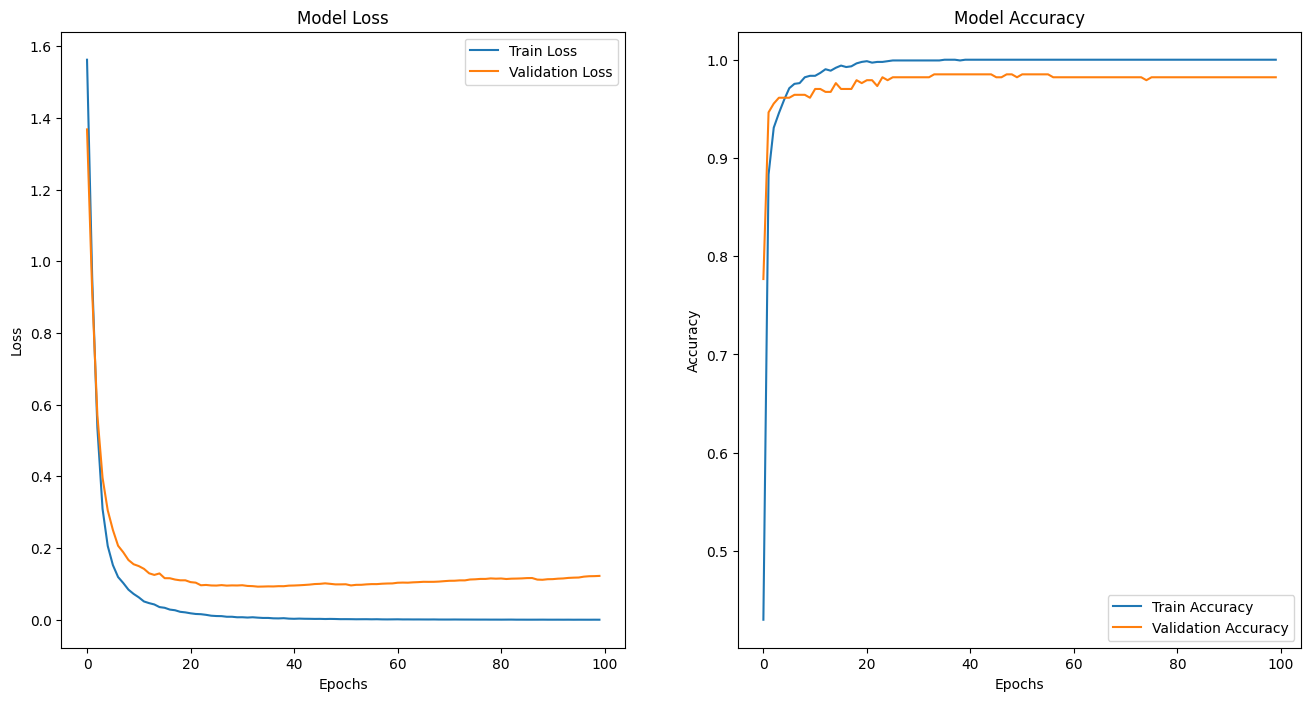

In [ ]:
plot_history(history)

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

14/14 [==============================] - 0s 16ms/step
test_acc : 0.9714285714285714
test_loss : 0.16899751476060224
precision : 0.9712951009966437
recall : 0.9714285714285714
f1score : 0.9711325289582863



In [ ]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add an LSTM layer with 128 units
  model.add(LSTM(units=128))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
X_train.shape

(1344, 72, 12)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.target_spec.supported_ops = [tf.compat.v1.lite.constants.INT8]
#converter.inference_input_type = tf.compat.v1.lite.constants.INT8 #replaces the above line for use with TF2.x
#converter.inference_output_type = tf.compat.v1.lite.constants.INT8 #replaces the above line for use with TF2.x
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # Set input type to int8
converter.inference_output_type = tf.int8  # Set output type to int8

def representative_dataset_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(X_train.astype(np.float32)).batch(1).take(100):
    yield [input_value]

converter.representative_dataset = representative_dataset_gen

tflite_model = converter.convert()
tflite_model_size = open(MODEL_TFLITE, "wb").write(tflite_model)
print("Quantized model is %d bytes" % tflite_model_size)

Quantized model is 98056 bytes


In [ ]:
!xxd -i {MODEL_TFLITE} > {MODEL_CC}

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=MODEL_TFLITE)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Check the input type
input_shape = input_details[0]['shape']
input_type = input_details[0]['dtype']
print(f"Input shape: {input_shape}, Input type: {input_type}")

Input shape: [ 1 72 12  1], Input type: <class 'numpy.int8'>


In [ ]:
input_scale, input_zero_point = input_details[0]['quantization']

In [ ]:
input_scale, input_zero_point

(0.09299756586551666, 8)

In [ ]:
output_scale, output_zero_point = output_details[0]['quantization']

In [ ]:
output_scale, output_zero_point

(0.00390625, -128)

In [ ]:
# Prepare the input data: Assuming you have a sample input called `sample_input`
# Here, we are using the first sample from the training data as an example
sample_input = X_train[0].astype(np.float32)

# Normalize the input data if needed, here it assumes the data is already normalized
sample_input = np.expand_dims(sample_input, axis=0)  # Add batch dimension

# Convert the input data to int8
if input_type == np.int8:
    input_scale, input_zero_point = input_details[0]['quantization']
    sample_input = sample_input / input_scale + input_zero_point
    sample_input = sample_input.astype(np.int8)

In [ ]:


# Initialize the interpreter
#
interpreter = tf.lite.Interpreter(MODEL_TFLITE)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

#
# For quantized models, manually quantize the input data from float to integer
#
input_scale, input_zero_point = input_details["quantization"]
test_data = np.expand_dims(X_test[0], axis=0)
test_data = test_data / input_scale + input_zero_point
test_data = test_data.astype(input_details["dtype"])

#
# Run the interpreter
#
interpreter.set_tensor(input_details["index"], test_data)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
top_prediction = output.argmax()

In [ ]:
top_prediction

1

In [ ]:
output, output_scale, output_zero_point

(array([-128,  127, -128, -128, -128, -128, -128], dtype=int8),
 0.00390625,
 -128)

In [ ]:
output_scale, output_zero_point = output_details["quantization"]

In [ ]:
output_scale * (output - output_zero_point)

array([ 0.        , -0.00390625,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [42]:
from tensorflow.keras.optimizers import Adam

def create_model(n_timesteps, n_features, n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 4
  model.add(Conv2D(filters=32, kernel_size=(4, 1), activation='relu', input_shape=(n_timesteps,1, n_features)))

  # Add a 1D Convolutional layer with 64 filters and a kernel size of 4
  model.add(Conv2D(filters=32, kernel_size=(4, 1), activation='relu', input_shape=(n_timesteps,1, n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling2D(pool_size=(2, 1)))

  # Add a Flatten layer
  model.add(Flatten())

  # # Add a fully connected layer
  # model.add(Dense(units=50, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  return model

In [43]:
create_model(75, 12, 7)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 72, 1, 32)         1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 1, 32)         4128      
                                                                 
 dropout_1 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1088)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 7623      
                                                      

In [44]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2082    X valid length: 694
y train length: 2082    y valid length: 694
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 72, 1, 32)         1568      
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 1, 32)         4128      
                                                                 
 dropout_2 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1088)              0         
                                                    

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [46]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [47]:
X_train.shape, X_valid.shape, X_test.shape

((2082, 75, 1, 12), (694, 75, 1, 12), (695, 75, 1, 12))

In [48]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
66/66 [==============================] - 2s 20ms/step - loss: 2.0536 - accuracy: 0.1888 - val_loss: 1.7121 - val_accuracy: 0.2781
Epoch 2/200
66/66 [==============================] - 1s 15ms/step - loss: 1.6682 - accuracy: 0.3295 - val_loss: 1.5293 - val_accuracy: 0.4568
Epoch 3/200
66/66 [==============================] - 1s 10ms/step - loss: 1.4564 - accuracy: 0.4793 - val_loss: 1.3774 - val_accuracy: 0.5591
Epoch 4/200
66/66 [==============================] - 1s 9ms/step - loss: 1.2608 - accuracy: 0.5644 - val_loss: 1.2316 - val_accuracy: 0.6383
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 1.0650 - accuracy: 0.6494 - val_loss: 1.0870 - val_accuracy: 0.6772
Epoch 6/200
66/66 [==============================] - 1s 10ms/step - loss: 0.9158 - accuracy: 0.7017 - val_loss: 0.9480 - val_accuracy: 0.7594
Epoch 7/200
66/66 [==============================] - 1s 9ms/step - loss: 0.7691 - accuracy: 0.7695 - val_loss: 0.8362 - val_accuracy: 0.7867
Epoch 8/2

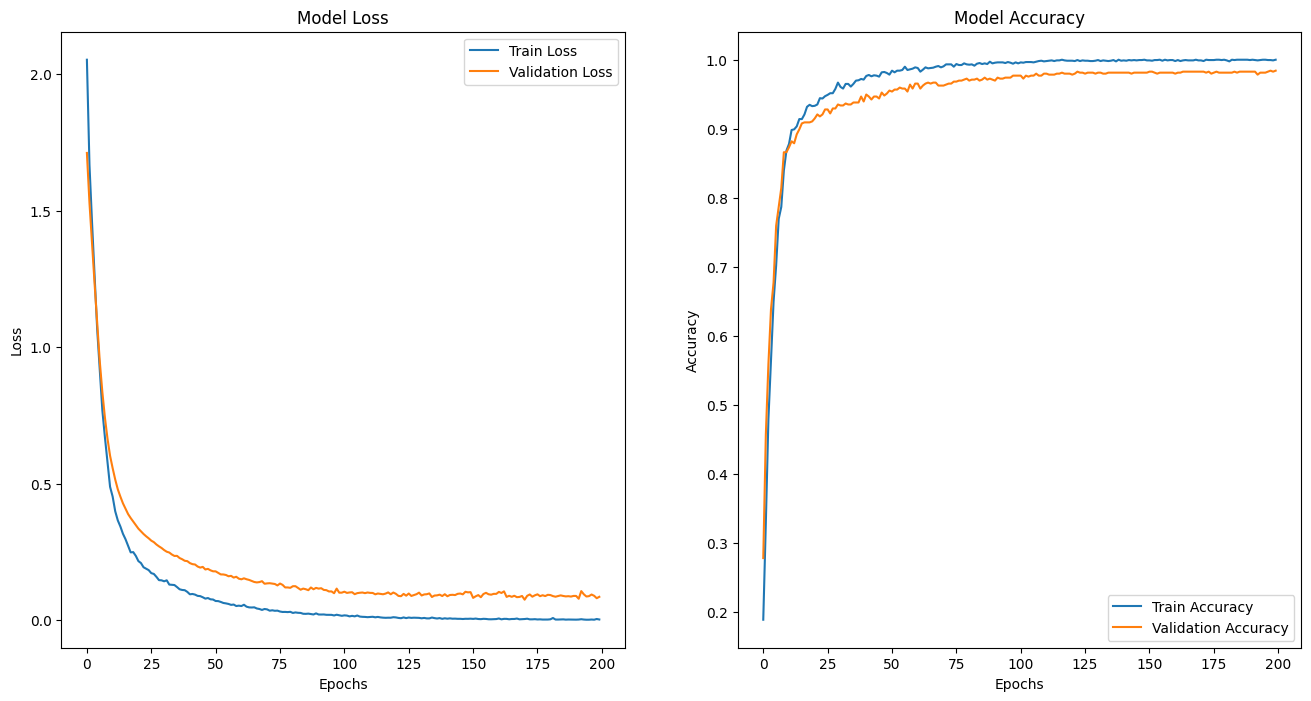

In [49]:
plot_history(history)

In [50]:
import tensorflow as tf

In [51]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

22/22 [==============================] - 0s 3ms/step
test_acc : 0.9884892086330935
test_loss : 0.03198514207282639
precision : 0.9885038264422861
recall : 0.9884892086330935
f1score : 0.9884545955615666



In [52]:
SAVED_MODEL = '/content/drive/MyDrive/ee488/IMU_Gesture/models/model_20240603'
MODEL_TFLITE = '/content/drive/MyDrive/ee488/IMU_Gesture/models/converted_model_20240603.tflite'
MODEL_CC = '/content/drive/MyDrive/ee488/IMU_Gesture/models/model_20240603.cc'

In [53]:
model.save(SAVED_MODEL)

In [54]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.target_spec.supported_ops = [tf.compat.v1.lite.constants.INT8]
#converter.inference_input_type = tf.compat.v1.lite.constants.INT8 #replaces the above line for use with TF2.x
#converter.inference_output_type = tf.compat.v1.lite.constants.INT8 #replaces the above line for use with TF2.x
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # Set input type to int8
converter.inference_output_type = tf.int8  # Set output type to int8

def representative_dataset_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(X_train.astype(np.float32)).batch(1).take(100):
    yield [input_value]

converter.representative_dataset = representative_dataset_gen

tflite_model = converter.convert()
tflite_model_size = open(MODEL_TFLITE, "wb").write(tflite_model)
print("Quantized model is %d bytes" % tflite_model_size)

Quantized model is 18376 bytes


In [55]:
!xxd -i {MODEL_TFLITE} > {MODEL_CC}

In [56]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=MODEL_TFLITE)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Check the input type
input_shape = input_details[0]['shape']
input_type = input_details[0]['dtype']
print(f"Input shape: {input_shape}, Input type: {input_type}")

Input shape: [ 1 75  1 12], Input type: <class 'numpy.int8'>


In [57]:
input_scale, input_zero_point = input_details[0]['quantization']

In [58]:
input_scale, input_zero_point

(0.09062974154949188, -12)

In [60]:
# Individual Models
df['user'].unique()

array(['cy', 'sy', 'mj', 'dh', 'jh'], dtype=object)

CY

In [61]:
df_cy = df[df['user'] == 'cy']

In [63]:
df_cy['unique_id']

0          1
1          1
2          1
3          1
4          1
        ... 
52706    700
52707    700
52708    700
52709    700
52710    700
Name: unique_id, Length: 52500, dtype: int64

In [64]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(1, 701), test_size=0.2, shuffle=True, random_state=7317)

In [65]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df_cy[df_cy['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df_cy[df_cy['unique_id'] == test_id])

In [66]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [67]:
df_train.shape, df_test.shape

((42000, 16), (10500, 16))

In [68]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.026230952380952376 0.23752443281651522
-0.04782261904761905 0.1613357618750637
0.9315359523809522 0.3191390432797616
0.8403266666666666 42.82189661902461
0.39091571428571426 95.34799000218466
0.02719428571428576 22.731103551749275
0.254435 0.4414554443501955
-0.5305347619047619 0.28058859008671055
-0.6813604761904762 0.45534154272711225
3.6899395238095236 74.81471459215672
2.630607857142857 117.72683059331537
0.6260007142857144 76.33017694934041


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,...,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00
mean,3.05,50.83,-0.03,-0.05,0.93,0.84,0.39,0.03,0.25,-0.53,...,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.99,29.16,0.24,0.16,0.32,42.82,95.35,22.73,0.44,0.28,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-2.60,-1.50,-1.38,-317.32,-627.69,-186.40,-4.00,-4.00,...,-7.24,-7.43,-6.59,-8.20,-9.64,-12.36,-7.29,-7.04,-7.19,-6.95
25%,1.00,25.75,-0.09,-0.13,0.99,-4.52,-4.82,-2.75,0.13,-0.65,...,0.18,-0.13,-0.05,-0.12,-0.28,-0.43,-0.37,-0.16,-0.13,-0.14
50%,3.00,51.50,-0.03,-0.07,1.00,0.49,0.12,0.06,0.26,-0.54,...,0.21,-0.01,-0.00,0.00,0.01,-0.03,-0.11,-0.02,-0.01,-0.03
75%,5.00,76.00,0.07,-0.02,1.01,5.74,5.00,2.93,0.51,-0.44,...,0.25,0.11,0.05,0.13,0.58,0.32,0.09,0.10,0.11,0.06
max,6.00,100.00,2.84,1.09,2.88,476.26,638.73,257.93,4.00,2.35,...,6.11,11.10,6.69,11.35,8.48,10.27,10.06,9.65,12.55,9.22


In [69]:
meanscale_by_col

{'Ax': [-0.026230952380952376, 0.23752443281651522],
 'Ay': [-0.04782261904761905, 0.1613357618750637],
 'Az': [0.9315359523809522, 0.3191390432797616],
 'Gx': [0.8403266666666666, 42.82189661902461],
 'Gy': [0.39091571428571426, 95.34799000218466],
 'Gz': [0.02719428571428576, 22.731103551749275],
 'AEx': [0.254435, 0.4414554443501955],
 'AEy': [-0.5305347619047619, 0.28058859008671055],
 'AEz': [-0.6813604761904762, 0.45534154272711225],
 'GEx': [3.6899395238095236, 74.81471459215672],
 'GEy': [2.630607857142857, 117.72683059331537],
 'GEz': [0.6260007142857144, 76.33017694934041]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [70]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [71]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-5.79689738e-02, -7.54784978e-02,  3.08530246e-01,
          3.03808901e-01,  1.32051476e-02, -6.54255207e-02,
          3.52583714e-02, -1.42366886e+00, -5.89973676e-01,
         -2.07170412e-02, -9.23375564e-02, -1.32136478e-01],
        [-1.58680418e-02, -1.99443574e-01,  1.20524419e-01,
          1.89848512e-01,  7.84398736e-02,  5.24746065e-02,
         -2.81874426e-01, -1.06727518e+00, -4.14281382e-01,
          3.96981538e-01,  1.60489511e-02, -2.73286503e-02],
        [ 1.10434754e-01, -2.61426112e-01,  1.51858723e-01,
         -4.39104013e-02,  8.10618481e-02,  1.97650136e-01,
         -4.40440825e-01, -5.32684661e-01, -3.04473699e-01,
          5.06184655e-01, -5.13953177e-02, -6.62910443e-03],
        [ 3.20939414e-01, -2.61426112e-01,  3.39864551e-01,
         -2.39137625e-01,  3.94248928e-02,  2.16127022e-01,
         -3.72483797e-01,  1.90585763e-03, -8.48583320e-02,
          4.73570750e-01, -6.54108143e-02, -2.65425916e-02],
        [ 3.20939414e-01, -1.3495959

In [72]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[ 6.83338223e-02,  4.20381807e-01,  2.77195942e-01,
          3.72231839e-01, -1.56365720e-02,  5.60149035e-01,
          7.14828652e-01, -1.05012246e-01, -3.26435236e-01,
         -3.71583848e-01, -2.46847789e-01, -6.41502518e-01],
        [ 2.78838482e-01,  2.96416730e-01,  2.77195942e-01,
          4.39253625e-01,  6.50153641e-02,  4.22892170e-01,
          1.39439893e+00, -9.24717709e-01, -1.11705056e+00,
          1.46496054e-01, -1.38970936e-01, -7.46231824e-02],
        [ 4.47242211e-01,  1.10469116e-01,  2.45861637e-01,
          3.88111565e-01,  6.95251603e-02,  3.12910708e-01,
         -5.53509993e-02,  1.80102697e-01, -1.50742942e-01,
         -3.30140874e-02,  5.36576002e-01, -5.53647441e-02],
        [ 3.63040346e-01,  2.34434192e-01,  2.45861637e-01,
          2.26979048e-01,  3.94248928e-02,  2.61879310e-01,
          2.39129455e-01,  7.31845935e-02, -2.16627552e-01,
         -3.30140874e-02,  2.17192564e-01, -3.45341884e-02],
        [ 3.20939414e-01,  1.7245165

In [73]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((560, 75, 12), (140, 75, 12))

In [74]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [75]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [76]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [77]:
Y_train_valid.shape, Y_test.shape

((560, 7), (140, 7))

In [78]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 420    X valid length: 140
y train length: 420    y valid length: 140
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 72, 1, 32)         1568      
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 1, 32)         4128      
                                                                 
 dropout_3 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1088)              0         
                                                      

In [79]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [80]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [81]:
X_train.shape, X_valid.shape, X_test.shape

((420, 75, 1, 12), (140, 75, 1, 12), (140, 75, 1, 12))

In [82]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
14/14 [==============================] - 1s 27ms/step - loss: 2.0664 - accuracy: 0.1833 - val_loss: 1.7694 - val_accuracy: 0.3071
Epoch 2/200
14/14 [==============================] - 0s 12ms/step - loss: 1.8336 - accuracy: 0.2500 - val_loss: 1.6149 - val_accuracy: 0.3929
Epoch 3/200
14/14 [==============================] - 0s 14ms/step - loss: 1.6927 - accuracy: 0.3381 - val_loss: 1.5066 - val_accuracy: 0.4286
Epoch 4/200
14/14 [==============================] - 0s 10ms/step - loss: 1.5467 - accuracy: 0.3881 - val_loss: 1.4220 - val_accuracy: 0.4857
Epoch 5/200
14/14 [==============================] - 0s 11ms/step - loss: 1.4488 - accuracy: 0.4667 - val_loss: 1.3506 - val_accuracy: 0.5643
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 1.3734 - accuracy: 0.5333 - val_loss: 1.2815 - val_accuracy: 0.6929
Epoch 7/200
14/14 [==============================] - 0s 11ms/step - loss: 1.2274 - accuracy: 0.6000 - val_loss: 1.2181 - val_accuracy: 0.7286
Epoch 

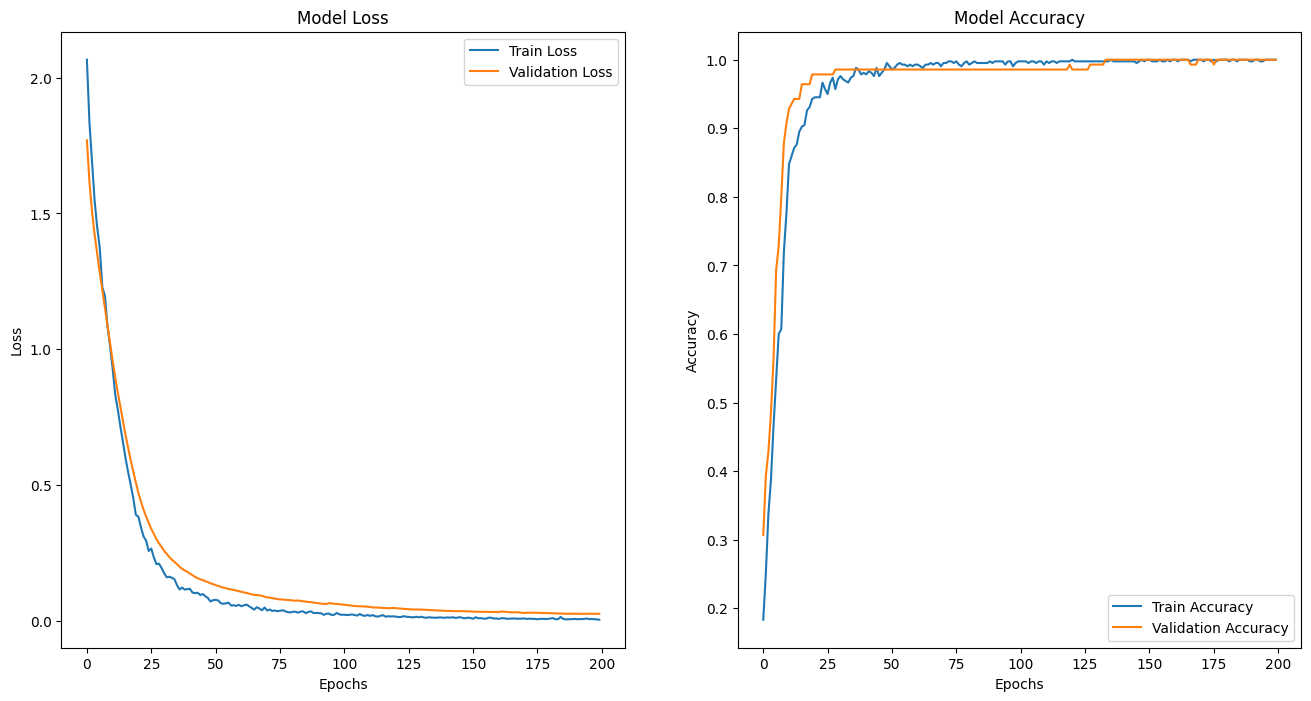

In [83]:
plot_history(history)

In [84]:
import tensorflow as tf

In [85]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

5/5 [==============================] - 0s 7ms/step
test_acc : 0.9928571428571429
test_loss : 0.062485104852989574
precision : 0.9933333333333333
recall : 0.9928571428571429
f1score : 0.9928782547501758



SY

In [86]:
df_sy = df[df['user'] == 'sy']

In [87]:
df_sy['unique_id']

38239     701
38240     701
38241     701
38242     701
38243     701
         ... 
38233    1400
38234    1400
38235    1400
38236    1400
38237    1400
Name: unique_id, Length: 52500, dtype: int64

In [88]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(701, 1401), test_size=0.2, shuffle=True, random_state=7317)

In [92]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df_sy[df_sy['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df_sy[df_sy['unique_id'] == test_id])

In [93]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [94]:
df_train.shape, df_test.shape

((42000, 16), (10500, 16))

In [95]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

0.047584999999999995 0.29706821994082355
-0.041981904761904755 0.10008815474461204
0.9432292857142857 0.26980811135299615
0.19843000000000002 20.30104356247669
0.11462714285714301 95.41799936753985
-0.3696980952380952 14.452033589455787
0.3395795238095238 0.4150325567949739
-0.44712380952380965 0.3629931376824294
-0.6692166666666667 0.5091479116255888
2.334573333333333 87.59899691638056
2.576580238095238 104.22676150119342
0.7478019047619048 53.44777020295961


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,...,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00
mean,3.05,50.83,0.05,-0.04,0.94,0.20,0.11,-0.37,0.34,-0.45,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.99,29.16,0.30,0.10,0.27,20.30,95.42,14.45,0.42,0.36,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-1.91,-1.13,-1.21,-187.26,-746.64,-214.11,-4.00,-3.94,...,-7.98,-9.23,-7.83,-14.79,-10.46,-9.62,-6.54,-12.31,-6.27,-8.08
25%,1.00,25.75,-0.01,-0.09,0.99,-3.60,-6.04,-1.77,0.24,-0.67,...,0.17,-0.19,-0.06,-0.10,-0.24,-0.61,-0.47,-0.15,-0.15,-0.14
50%,3.00,51.50,0.11,-0.04,1.00,0.49,0.00,0.00,0.32,-0.48,...,0.21,0.01,-0.00,0.03,-0.05,-0.09,-0.14,-0.01,-0.01,-0.05
75%,5.00,76.00,0.17,-0.01,1.01,4.15,5.37,1.59,0.43,-0.23,...,0.25,0.19,0.06,0.14,0.22,0.60,0.23,0.22,0.12,0.14
max,6.00,100.00,3.56,1.19,2.82,227.72,780.09,150.70,3.82,3.95,...,6.96,11.21,8.17,10.45,8.39,12.11,9.17,9.21,9.48,7.87


In [96]:
meanscale_by_col

{'Ax': [0.047584999999999995, 0.29706821994082355],
 'Ay': [-0.041981904761904755, 0.10008815474461204],
 'Az': [0.9432292857142857, 0.26980811135299615],
 'Gx': [0.19843000000000002, 20.30104356247669],
 'Gy': [0.11462714285714301, 95.41799936753985],
 'Gz': [-0.3696980952380952, 14.452033589455787],
 'AEx': [0.3395795238095238, 0.4150325567949739],
 'AEy': [-0.44712380952380965, 0.3629931376824294],
 'AEz': [-0.6692166666666667, 0.5091479116255888],
 'GEx': [2.334573333333333, 87.59899691638056],
 'GEy': [2.576580238095238, 104.22676150119342],
 'GEz': [0.7478019047619048, 53.44777020295961]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [97]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [98]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[ 7.48700080e-01, -2.47799648e+00,  9.92213101e-02,
          8.02006554e-01,  2.00961799e-01, -7.55623895e-01,
         -3.60404314e-01,  1.29820111e-01, -1.19382466e-01,
         -1.39025077e+00, -1.63687884e+00, -2.43561179e-01],
        [ 4.79401667e-01,  1.51848044e+00, -4.19665981e-01,
          7.86736404e-01, -4.79622581e-01, -7.59775559e-01,
          4.10619537e-01,  2.67563762e-01, -2.96148388e-01,
         -8.46066461e-01, -1.13326538e+00, -6.76885470e-02],
        [ 6.47713175e-01,  6.19273129e-01, -5.30856115e-01,
          4.16932114e+00, -1.57480379e+00, -2.54637534e+00,
         -9.53648651e-02,  2.12466302e-01, -3.94351678e-01,
         -9.25519426e-01, -8.21733104e-01,  2.28114252e-01],
        [-1.80963484e+00, -2.37808456e+00, -1.60222335e-01,
         -7.91507587e-01, -1.93093832e-01,  1.84193442e+00,
          1.69674583e-01,  2.67563762e-01, -2.17585756e-01,
         -8.29285447e-01, -7.42674714e-01,  4.32425862e-01],
        [-4.63142776e-01, -7.7949379

In [99]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[ 6.14050874e-01,  1.19713514e-01,  2.10411444e-01,
         -5.16441432e-02, -1.20131572e-03,  2.55810432e-02,
          1.01311616e-03, -4.21154492e-01, -1.39023124e-01,
          1.23908573e-02, -1.09631922e-01, -4.13076522e-02],
        [ 5.46726271e-01,  1.98015916e-02,  2.10411444e-01,
         -9.07835104e-04, -1.01094882e-02, -8.32421984e-03,
          1.01311616e-03, -4.21154492e-01, -1.58663782e-01,
          1.02218826e-02, -9.32253876e-02, -4.59851159e-02],
        [ 5.80388572e-01,  1.98015916e-02,  2.10411444e-01,
          1.01549952e-01, -5.87376300e-02, -5.05328126e-02,
          4.92021068e-02, -6.13995603e-01, -3.15789046e-01,
          4.85784862e-02, -1.23064173e-01, -2.87720498e-02],
        [ 4.79401667e-01, -8.01103313e-02,  2.10411444e-01,
          1.37508695e-01, -7.54011527e-02, -5.05328126e-02,
          1.03707642e+00, -8.34385444e-01, -7.28242864e-01,
          1.69812751e-01, -2.34935633e-01,  1.53836129e-01],
        [ 6.14050874e-01, -1.8002225

In [100]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((560, 75, 12), (140, 75, 12))

In [101]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [102]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [103]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [104]:
Y_train_valid.shape, Y_test.shape

((560, 7), (140, 7))

In [105]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 420    X valid length: 140
y train length: 420    y valid length: 140
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 72, 1, 32)         1568      
                                                                 
 conv2d_9 (Conv2D)           (None, 69, 1, 32)         4128      
                                                                 
 dropout_4 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1088)              0         
                                                      

In [106]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [107]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [108]:
X_train.shape, X_valid.shape, X_test.shape

((420, 75, 1, 12), (140, 75, 1, 12), (140, 75, 1, 12))

In [109]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
14/14 [==============================] - 1s 25ms/step - loss: 2.0464 - accuracy: 0.1976 - val_loss: 1.8097 - val_accuracy: 0.2500
Epoch 2/200
14/14 [==============================] - 0s 11ms/step - loss: 1.8511 - accuracy: 0.2857 - val_loss: 1.6866 - val_accuracy: 0.4786
Epoch 3/200
14/14 [==============================] - 0s 11ms/step - loss: 1.7363 - accuracy: 0.3429 - val_loss: 1.5953 - val_accuracy: 0.5143
Epoch 4/200
14/14 [==============================] - 0s 10ms/step - loss: 1.6425 - accuracy: 0.3667 - val_loss: 1.5248 - val_accuracy: 0.5357
Epoch 5/200
14/14 [==============================] - 0s 11ms/step - loss: 1.5779 - accuracy: 0.4262 - val_loss: 1.4651 - val_accuracy: 0.5643
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 1.4825 - accuracy: 0.4857 - val_loss: 1.4162 - val_accuracy: 0.6000
Epoch 7/200
14/14 [==============================] - 0s 10ms/step - loss: 1.4316 - accuracy: 0.4976 - val_loss: 1.3657 - val_accuracy: 0.6071
Epoch 

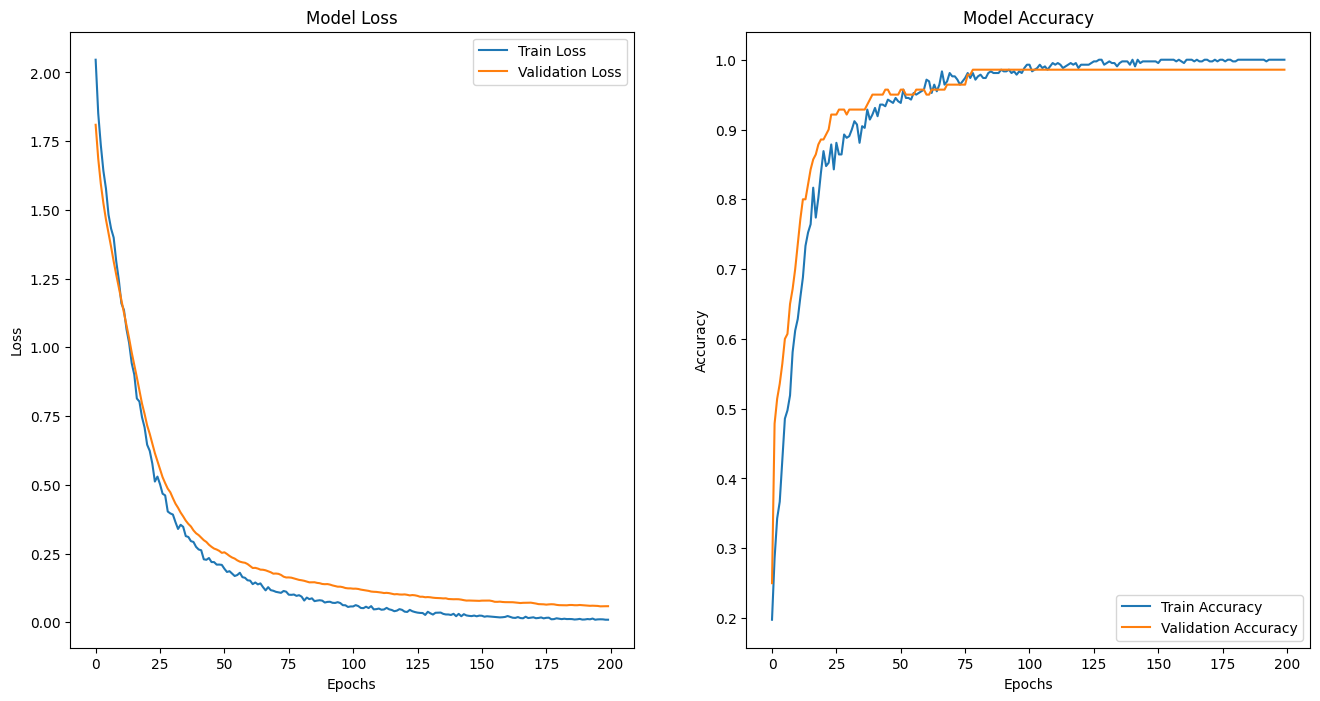

In [110]:
plot_history(history)

In [111]:
import tensorflow as tf

In [112]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

5/5 [==============================] - 0s 4ms/step
test_acc : 0.9714285714285714
test_loss : 0.06359354536410226
precision : 0.9723964131106988
recall : 0.9714285714285714
f1score : 0.9715710544905468



MJ

In [113]:
df_mj = df[df['user'] == 'mj']

In [114]:
df_mj['unique_id']

0        1401
1        1401
2        1401
3        1401
4        1401
         ... 
52121    2071
52122    2071
52123    2071
52124    2071
52125    2071
Name: unique_id, Length: 50325, dtype: int64

In [115]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(1401, 2072), test_size=0.2, shuffle=True, random_state=7317)

In [116]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df_mj[df_mj['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df_mj[df_mj['unique_id'] == test_id])

In [117]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [118]:
df_train.shape, df_test.shape

((40200, 16), (10125, 16))

In [119]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.24272437810945274 0.2075589244459283
0.04959776119402985 0.21636845507882313
0.8971042288557215 0.32509537074775346
0.7777231343283583 48.01240081626572
0.5375843283582088 109.71349584719643
-0.001709452736318437 28.27384644629761
0.029730597014925374 0.4648173070299437
-0.5719164179104478 0.3589236105192352
-0.6656885572139304 0.4557036366937709
3.1697482587064676 97.35641786650392
2.773513184079602 109.8985314976575
-0.6461253731343282 59.13233094519564


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,...,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00,40200.00
mean,3.01,51.27,-0.24,0.05,0.90,0.78,0.54,-0.00,0.03,-0.57,...,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,2.00,29.15,0.21,0.22,0.33,48.01,109.71,28.27,0.46,0.36,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-2.75,-1.63,-1.82,-401.31,-942.69,-265.38,-4.00,-4.00,...,-8.36,-8.37,-8.60,-9.39,-8.67,-9.55,-7.32,-12.48,-9.09,-20.48
25%,1.00,27.00,-0.34,-0.15,0.91,-4.39,-7.45,-3.48,-0.18,-0.74,...,0.04,-0.11,-0.07,-0.12,-0.45,-0.47,-0.34,-0.13,-0.11,-0.17
50%,3.00,53.00,-0.25,0.08,0.96,0.43,0.00,-0.06,0.00,-0.60,...,0.19,-0.01,-0.00,-0.00,-0.06,-0.08,-0.12,-0.01,-0.01,-0.02
75%,5.00,76.25,-0.11,0.26,0.98,6.53,6.10,2.50,0.20,-0.48,...,0.25,0.12,0.05,0.09,0.37,0.26,0.23,0.13,0.08,0.17
max,6.00,100.00,1.91,0.95,2.94,398.86,1035.52,285.16,4.00,3.99,...,6.28,8.29,9.43,10.09,8.54,12.71,10.24,8.39,9.35,9.75


In [120]:
meanscale_by_col

{'Ax': [-0.24272437810945274, 0.2075589244459283],
 'Ay': [0.04959776119402985, 0.21636845507882313],
 'Az': [0.8971042288557215, 0.32509537074775346],
 'Gx': [0.7777231343283583, 48.01240081626572],
 'Gy': [0.5375843283582088, 109.71349584719643],
 'Gz': [-0.001709452736318437, 28.27384644629761],
 'AEx': [0.029730597014925374, 0.4648173070299437],
 'AEy': [-0.5719164179104478, 0.3589236105192352],
 'AEz': [-0.6656885572139304, 0.4557036366937709],
 'GEx': [3.1697482587064676, 97.35641786650392],
 'GEy': [2.773513184079602, 109.8985314976575],
 'GEz': [-0.6461253731343282, 59.13233094519564]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [121]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [122]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[ 9.76707596e-01,  1.06486058e+00,  2.24228881e-01,
         -3.49332946e-03, -4.89989244e-03,  4.30466555e-03,
         -6.39618976e-02, -5.03828156e-02, -2.94734191e-01,
         -1.05770968e-02, -1.35899285e-02, -1.37636148e-02],
        [ 9.28528506e-01,  1.06486058e+00,  2.24228881e-01,
         -9.93975171e-04, -8.81919148e-03,  8.54887053e-03,
         -6.39618976e-02, -7.82438972e-02, -2.94734191e-01,
         -1.31449810e-02, -1.35899285e-02, -1.59620737e-02],
        [ 9.28528506e-01,  1.11107804e+00,  2.24228881e-01,
          2.55701974e-04, -7.72543361e-03,  8.54887053e-03,
         -6.39618976e-02, -7.82438972e-02, -2.94734191e-01,
         -1.68427341e-02, -6.94743755e-03, -2.10354405e-02],
        [ 9.28528506e-01,  1.06486058e+00,  2.24228881e-01,
         -5.99268375e-03, -2.71237669e-03, -4.18374442e-03,
         -6.39618976e-02, -7.82438972e-02, -2.94734191e-01,
         -1.75617417e-02, -6.94743755e-03, -1.90060938e-02],
        [ 9.28528506e-01,  1.0648605

In [123]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[ 2.05842164e-01,  8.33773291e-01,  2.54989085e-01,
          1.51674916e-01,  5.06994662e-02,  1.10056106e-01,
          1.08148733e-01, -4.12576876e-01, -2.50846018e-01,
         -2.68906240e-01,  1.96987906e-03, -8.19158411e-02],
        [-2.75948731e-01,  9.26208207e-01,  3.47269698e-01,
         -1.05133737e-01, -6.66060658e-02,  1.31467593e-02,
          6.51210756e-02, -2.17549305e-01, -5.33492402e-02,
         -3.46661771e-01, -4.13428016e-02,  1.49854633e-02],
        [-8.32323733e-02,  8.79990749e-01,  3.96676554e-02,
         -1.12840080e-01, -3.99912909e-02, -4.30889568e-02,
          6.51210756e-02, -3.84715795e-01,  1.24830191e-02,
         -2.55142381e-01,  8.96871567e-02, -1.69767471e-02],
        [-8.32323733e-02,  8.79990749e-01, -2.18527531e-02,
          2.96333579e-03,  1.96185132e-02,  2.17929650e-01,
         -1.93044871e-01, -5.51882284e-01,  7.83152785e-02,
         -4.25649887e-01,  6.97449552e-03, -3.03366128e-02],
        [-2.75948731e-01,  7.4133837

In [124]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((536, 75, 12), (135, 75, 12))

In [125]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [126]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [127]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [128]:
Y_train_valid.shape, Y_test.shape

((536, 7), (135, 7))

In [129]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 402    X valid length: 134
y train length: 402    y valid length: 134
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_11 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_5 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1088)              0         
                                                      

In [130]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [131]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [132]:
X_train.shape, X_valid.shape, X_test.shape

((402, 75, 1, 12), (134, 75, 1, 12), (135, 75, 1, 12))

In [133]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
13/13 [==============================] - 2s 47ms/step - loss: 2.2171 - accuracy: 0.1592 - val_loss: 1.9588 - val_accuracy: 0.1866
Epoch 2/200
13/13 [==============================] - 0s 18ms/step - loss: 1.9990 - accuracy: 0.2239 - val_loss: 1.8520 - val_accuracy: 0.2463
Epoch 3/200
13/13 [==============================] - 0s 20ms/step - loss: 1.9273 - accuracy: 0.2587 - val_loss: 1.7609 - val_accuracy: 0.2910
Epoch 4/200
13/13 [==============================] - 0s 19ms/step - loss: 1.7440 - accuracy: 0.3134 - val_loss: 1.6799 - val_accuracy: 0.3582
Epoch 5/200
13/13 [==============================] - 0s 21ms/step - loss: 1.6589 - accuracy: 0.3781 - val_loss: 1.6047 - val_accuracy: 0.5373
Epoch 6/200
13/13 [==============================] - 0s 18ms/step - loss: 1.5503 - accuracy: 0.4751 - val_loss: 1.5287 - val_accuracy: 0.6119
Epoch 7/200
13/13 [==============================] - 0s 19ms/step - loss: 1.4343 - accuracy: 0.5672 - val_loss: 1.4568 - val_accuracy: 0.6716
Epoch 

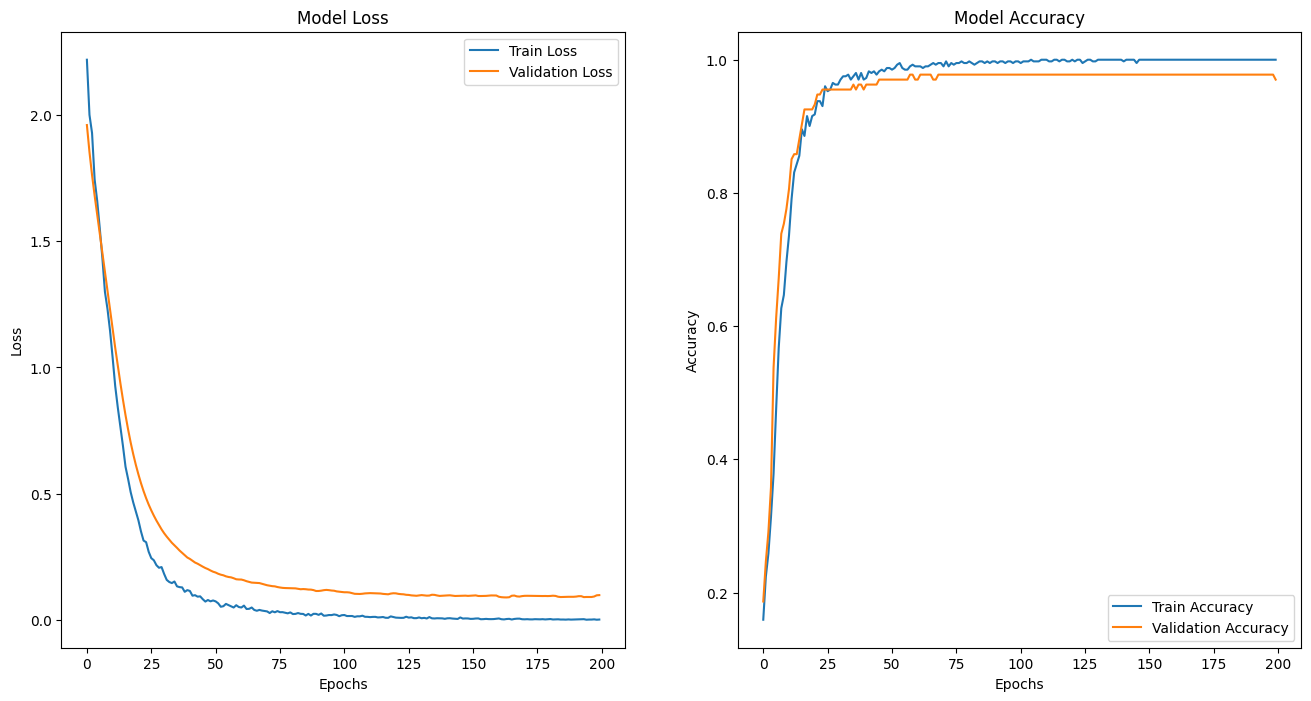

In [134]:
plot_history(history)

In [135]:
import tensorflow as tf

In [136]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

5/5 [==============================] - 0s 4ms/step
test_acc : 0.9851851851851852
test_loss : 0.038612622199667795
precision : 0.985843946713512
recall : 0.9851851851851852
f1score : 0.9851673896118339



DH

In [138]:
df_dh = df[df['user'] == 'dh']

In [139]:
df_dh['unique_id']

30235    2072
30236    2072
30237    2072
30238    2072
30239    2072
         ... 
7589     2771
7590     2771
7591     2771
7592     2771
7593     2771
Name: unique_id, Length: 52500, dtype: int64

In [165]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(2072, 2772), test_size=0.2, shuffle=True, random_state=7317)

In [166]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df_dh[df_dh['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df_dh[df_dh['unique_id'] == test_id])

In [167]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [168]:
df_train.shape, df_test.shape

((42000, 16), (10500, 16))

In [169]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.06580142857142857 0.32033657240004115
-0.051331904761904766 0.1463617414594352
0.9312780952380952 0.31229681363391415
0.2818088095238095 41.819834895794855
0.5768107142857142 105.91092685750868
-1.0494428571428573 29.00163024439228
-0.08834071428571429 0.5727744022025927
-0.5924604761904761 0.3726123906634933
-0.6337628571428571 0.4987613065446461
3.963021666666666 113.10752108488255
1.8791690476190477 119.94408234593952
-0.6410602380952379 61.69164300861248


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,...,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00
mean,3.05,50.83,-0.07,-0.05,0.93,0.28,0.58,-1.05,-0.09,-0.59,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.99,29.16,0.32,0.15,0.31,41.82,105.91,29.00,0.57,0.37,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-3.03,-1.85,-1.72,-337.52,-870.30,-260.13,-4.00,-4.00,...,-8.49,-8.08,-8.22,-8.93,-6.83,-9.14,-6.75,-8.48,-8.93,-12.37
25%,1.00,25.75,-0.17,-0.13,0.97,-4.21,-7.14,-3.42,-0.25,-0.75,...,0.12,-0.11,-0.07,-0.08,-0.28,-0.42,-0.41,-0.07,-0.10,-0.14
50%,3.00,51.50,-0.10,-0.07,0.99,0.49,0.12,-0.06,-0.09,-0.63,...,0.19,0.00,-0.00,0.03,-0.00,-0.10,-0.17,-0.02,-0.00,-0.02
75%,5.00,76.00,0.12,0.03,1.01,5.37,6.04,2.01,0.09,-0.46,...,0.25,0.12,0.05,0.11,0.31,0.36,0.17,0.07,0.09,0.13
max,6.00,100.00,3.70,1.17,3.27,327.51,776.25,214.42,4.00,4.00,...,7.49,7.82,7.32,7.43,7.14,12.33,9.29,8.71,10.29,9.07


In [170]:
meanscale_by_col

{'Ax': [-0.06580142857142857, 0.32033657240004115],
 'Ay': [-0.051331904761904766, 0.1463617414594352],
 'Az': [0.9312780952380952, 0.31229681363391415],
 'Gx': [0.2818088095238095, 41.819834895794855],
 'Gy': [0.5768107142857142, 105.91092685750868],
 'Gz': [-1.0494428571428573, 29.00163024439228],
 'AEx': [-0.08834071428571429, 0.5727744022025927],
 'AEy': [-0.5924604761904761, 0.3726123906634933],
 'AEz': [-0.6337628571428571, 0.4987613065446461],
 'GEx': [3.963021666666666, 113.10752108488255],
 'GEy': [1.8791690476190477, 119.94408234593952],
 'GEz': [-0.6410602380952379, 61.69164300861248]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [171]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [172]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-1.94857105e+00,  1.45747820e-01, -3.88342404e-01,
          1.53711539e-01,  6.35375322e-01,  4.74092068e-01,
          1.02717704e+00,  4.09166415e-01,  1.87991442e-01,
         -9.48922014e-02,  6.14793406e-01, -1.40146924e+00],
        [-1.54274789e+00,  7.74239542e-02, -5.48446503e-01,
          1.72841218e-01,  1.25835165e+00,  8.61311680e-01,
          8.70047112e-01,  8.71159334e-02, -4.53598024e-01,
          1.11725358e-01,  1.06617041e+00, -1.21051955e+00],
        [-1.60518222e+00,  2.82395552e-01, -4.20363223e-01,
          3.47877777e-01,  1.92457186e+00,  1.13060689e+00,
          6.25622781e-01,  2.74978714e-01, -2.33051645e-01,
          1.51687334e-01,  1.51804764e+00, -1.87430475e+00],
        [-1.60518222e+00,  2.82395552e-01, -1.64196665e-01,
          5.75520952e-01,  2.68577755e+00,  1.31990659e+00,
          8.35129350e-01,  3.28653795e-01, -9.27039493e-02,
          3.41064661e-01,  1.96025370e+00, -2.77069845e+00],
        [-8.87187402e-01, -4.6916697

In [173]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-3.25278412e-01, -8.10786303e-01,  1.56011533e-01,
          1.07171918e-02, -1.38617156e-03,  6.99768544e-02,
          1.45619536e-02,  3.01816255e-01, -4.53598024e-01,
         -2.37209837e-02, -3.55096222e-02,  1.54163545e-02],
        [-3.56495578e-01, -8.79110169e-01,  1.23990714e-01,
          7.84773998e-03, -1.46992455e-02,  5.92878001e-02,
          1.45619536e-02,  2.74978714e-01, -4.73647694e-01,
         -1.24043181e-02, -1.97522796e-02, -8.41183241e-03],
        [-5.12581408e-01, -9.47434035e-01,  9.19698937e-02,
         -1.24775435e-02, -2.21583437e-02,  2.79102537e-02,
          3.20208344e-02,  2.74978714e-01, -4.73647694e-01,
         -7.54168828e-03, -2.27536782e-02, -1.32747277e-02],
        [-5.75015741e-01, -8.79110169e-01,  5.99490739e-02,
         -2.41944716e-02, -2.32913712e-02,  2.34277470e-02,
          1.45619536e-02,  2.74978714e-01, -4.53598024e-01,
         -2.14858980e-03,  2.55188159e-02, -6.28762596e-02],
        [-4.81364242e-01, -9.4743403

In [174]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((560, 75, 12), (140, 75, 12))

In [175]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [176]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [177]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [178]:
Y_train_valid.shape, Y_test.shape

((560, 7), (140, 7))

In [179]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 420    X valid length: 140
y train length: 420    y valid length: 140
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_15 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_7 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1088)              0         
                                                      

In [180]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [181]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [182]:
X_train.shape, X_valid.shape, X_test.shape

((420, 75, 1, 12), (140, 75, 1, 12), (140, 75, 1, 12))

In [183]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
14/14 [==============================] - 2s 39ms/step - loss: 2.2752 - accuracy: 0.2071 - val_loss: 1.8757 - val_accuracy: 0.3357
Epoch 2/200
14/14 [==============================] - 0s 17ms/step - loss: 1.9852 - accuracy: 0.2429 - val_loss: 1.7287 - val_accuracy: 0.3143
Epoch 3/200
14/14 [==============================] - 0s 19ms/step - loss: 1.8456 - accuracy: 0.2667 - val_loss: 1.6376 - val_accuracy: 0.3571
Epoch 4/200
14/14 [==============================] - 0s 12ms/step - loss: 1.7693 - accuracy: 0.2976 - val_loss: 1.5663 - val_accuracy: 0.5643
Epoch 5/200
14/14 [==============================] - 0s 11ms/step - loss: 1.6592 - accuracy: 0.3762 - val_loss: 1.5006 - val_accuracy: 0.5857
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 1.5736 - accuracy: 0.4405 - val_loss: 1.4472 - val_accuracy: 0.6286
Epoch 7/200
14/14 [==============================] - 0s 11ms/step - loss: 1.4759 - accuracy: 0.5405 - val_loss: 1.3887 - val_accuracy: 0.6500
Epoch 

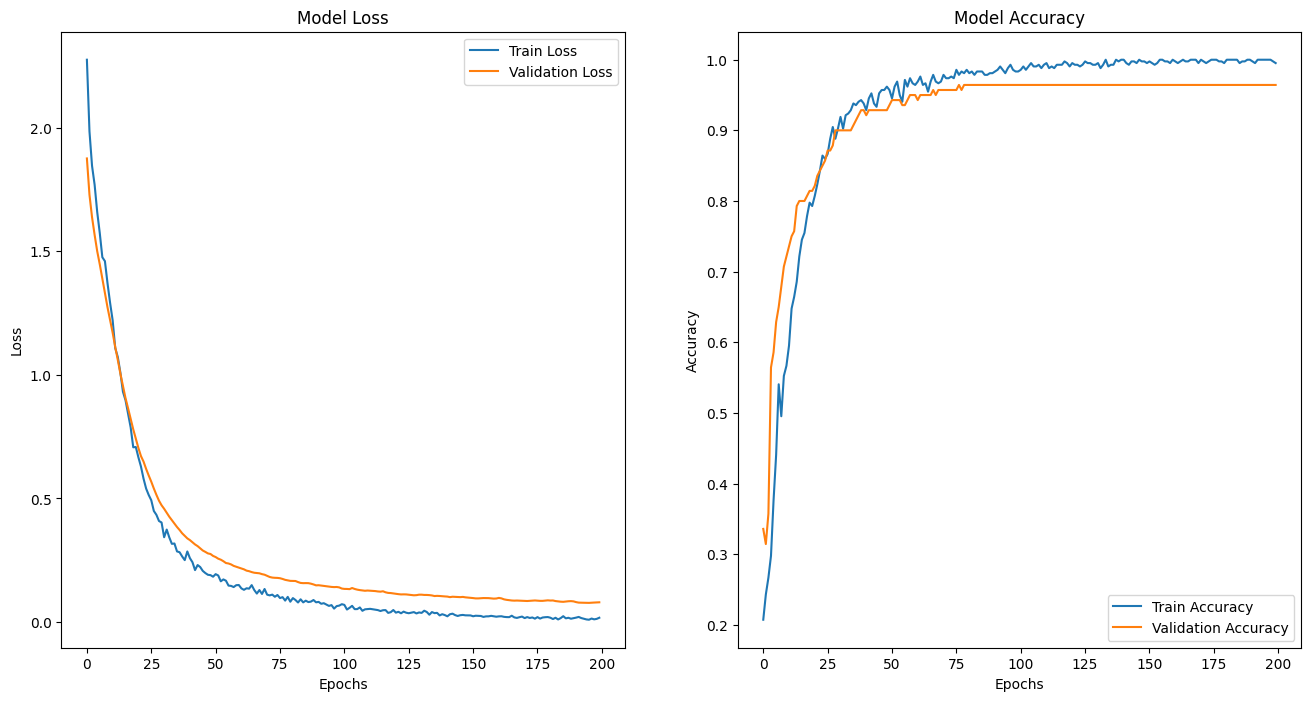

In [184]:
plot_history(history)

In [185]:
import tensorflow as tf

In [186]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

5/5 [==============================] - 0s 6ms/step
test_acc : 0.9714285714285714
test_loss : 0.09111866766689386
precision : 0.9717959183673469
recall : 0.9714285714285714
f1score : 0.9711210323807086



JH

In [187]:
df_jh = df[df['user'] == 'jh']

In [188]:
df_jh['unique_id']

0        2772
1        2772
2        2772
3        2772
4        2772
         ... 
51789    3471
51790    3471
51791    3471
51792    3471
51792    3471
Name: unique_id, Length: 52500, dtype: int64

In [190]:
# Data split
from sklearn.model_selection import train_test_split
train_list, test_list = list(), list()

train_ids, test_ids = train_test_split(range(2772, 3471), test_size=0.2, shuffle=True, random_state=7317)

In [191]:
dfs_train, dfs_test = list(), list()

for train_id in train_ids:
  dfs_train.append(df_jh[df_jh['unique_id'] == train_id])

for test_id in test_ids:
  dfs_test.append(df_jh[df_jh['unique_id'] == test_id])

In [192]:
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

In [193]:
df_train.shape, df_test.shape

((41925, 16), (10500, 16))

In [194]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.18523005366726297 0.2245010637743949
0.037354084675014915 0.12963135553950722
0.9311530113297555 0.30189378267046535
0.6296567680381634 34.26891840060477
0.27997901013714965 84.55559722147775
-0.30808562909958265 20.86915331933744
0.06526249254621348 0.4244467509537779
-0.5207503875968992 0.28079204751713654
-0.7334754919499106 0.49975657487821074
2.239096004770423 99.81273084047326
3.5429629099582587 103.06384311856054
0.944338938580799 70.0118593604031


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,...,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00,41925.00
mean,3.02,50.14,-0.19,0.04,0.93,0.63,0.28,-0.31,0.07,-0.52,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.98,28.86,0.22,0.13,0.30,34.27,84.56,20.87,0.42,0.28,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-2.33,-0.55,-1.39,-229.19,-576.60,-215.88,-4.00,-4.00,...,-7.69,-6.71,-6.82,-10.33,-9.58,-12.39,-6.54,-5.51,-5.70,-5.19
25%,1.00,25.00,-0.25,-0.04,0.96,-2.62,-6.59,-2.62,-0.12,-0.63,...,0.10,-0.09,-0.08,-0.11,-0.44,-0.39,-0.33,-0.12,-0.12,-0.12
50%,3.00,51.00,-0.14,0.03,1.00,0.43,0.00,0.00,0.04,-0.55,...,0.23,-0.01,-0.00,0.01,-0.06,-0.10,-0.15,-0.00,-0.02,-0.04
75%,5.00,75.00,-0.07,0.09,1.01,2.93,4.09,1.95,0.20,-0.40,...,0.26,0.07,0.05,0.11,0.32,0.43,0.19,0.08,0.07,0.10
max,6.00,100.00,1.23,0.76,3.72,229.06,678.41,155.33,3.87,2.70,...,9.24,6.67,8.02,7.46,8.96,11.47,8.65,5.31,7.02,6.33


In [195]:
meanscale_by_col

{'Ax': [-0.18523005366726297, 0.2245010637743949],
 'Ay': [0.037354084675014915, 0.12963135553950722],
 'Az': [0.9311530113297555, 0.30189378267046535],
 'Gx': [0.6296567680381634, 34.26891840060477],
 'Gy': [0.27997901013714965, 84.55559722147775],
 'Gz': [-0.30808562909958265, 20.86915331933744],
 'AEx': [0.06526249254621348, 0.4244467509537779],
 'AEy': [-0.5207503875968992, 0.28079204751713654],
 'AEz': [-0.7334754919499106, 0.49975657487821074],
 'GEx': [2.239096004770423, 99.81273084047326],
 'GEy': [3.5429629099582587, 103.06384311856054],
 'GEz': [0.944338938580799, 70.0118593604031]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [196]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [197]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[ 4.68728530e-01,  9.75529051e-02,  2.61174602e-01,
          1.37250679e-02, -1.18240558e-03,  3.24922444e-02,
          8.18418503e-02, -2.82235958e-01, -1.53123564e-01,
         -4.99845657e-02,  1.71127299e-01, -5.63245916e-03],
        [ 3.79642093e-01,  9.75529051e-02,  2.61174602e-01,
          2.24793565e-02, -1.18240558e-03,  4.39924713e-02,
         -4.83600103e-01, -2.82235958e-01, -1.13104081e-01,
          6.31272578e-02, -3.32120636e-02, -1.72175672e-01],
        [ 2.90555655e-01,  9.75529051e-02,  2.28050369e-01,
          5.28275568e-02,  2.48359784e-02,  3.53673011e-02,
          1.52522094e-01, -2.82235958e-01, -1.33113823e-01,
          1.06007559e-01, -1.71766959e-01, -2.97725830e-01],
        [ 3.35098874e-01,  2.04110750e-02,  2.28050369e-01,
          7.06279435e-02,  8.04207080e-02,  3.53673011e-02,
          5.53043478e-01, -2.46622413e-01, -1.13104081e-01,
          8.45674086e-02, -6.10588808e-02, -2.12311729e-01],
        [ 4.68728530e-01,  2.0411075

In [198]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-1.00119769e+00, -1.13671638e+00,  6.58665399e-01,
         -1.99538415e+00, -1.82364971e-01, -5.05622543e-01,
          3.41002746e-01, -1.03012039e+00, -4.53269691e-01,
         -8.05098662e-01, -6.69807770e-01, -9.33189599e-01],
        [-3.77592627e-01, -5.96723565e-01,  1.28677670e-01,
         -2.23233356e+00, -1.20985237e-01, -4.94468729e-02,
          4.58803153e-01, -1.10134747e+00, -4.73279432e-01,
         -6.86476519e-01, -6.25369295e-01, -8.19923074e-01],
        [-2.43962970e-01,  2.04110750e-02, -1.36316194e-01,
         -2.22854004e+00, -2.06845905e-01,  9.95769017e-02,
          5.53043478e-01, -8.52052665e-01, -3.53220982e-01,
         -4.37009344e-01, -5.89275163e-01, -6.66520492e-01],
        [-3.77592627e-01,  2.51836565e-01, -7.00677276e-02,
         -2.27493777e+00, -2.50958892e-01, -1.07906360e-01,
          3.17442664e-01, -3.89076590e-01,  4.69738531e-02,
         -7.80557749e-03, -4.25784267e-01, -4.81694662e-01],
        [-2.43962970e-01,  4.8326205

In [199]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((559, 75, 12), (140, 75, 12))

In [200]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [201]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [202]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [203]:
Y_train_valid.shape, Y_test.shape

((559, 7), (140, 7))

In [204]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 419    X valid length: 140
y train length: 419    y valid length: 140
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_17 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_8 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1088)              0         
                                                      

In [205]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [206]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [207]:
X_train.shape, X_valid.shape, X_test.shape

((419, 75, 1, 12), (140, 75, 1, 12), (140, 75, 1, 12))

In [208]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
14/14 [==============================] - 1s 24ms/step - loss: 2.5093 - accuracy: 0.1384 - val_loss: 2.1646 - val_accuracy: 0.1929
Epoch 2/200
14/14 [==============================] - 0s 10ms/step - loss: 2.1703 - accuracy: 0.1551 - val_loss: 1.9737 - val_accuracy: 0.1857
Epoch 3/200
14/14 [==============================] - 0s 11ms/step - loss: 1.9480 - accuracy: 0.2315 - val_loss: 1.8313 - val_accuracy: 0.3143
Epoch 4/200
14/14 [==============================] - 0s 12ms/step - loss: 1.7503 - accuracy: 0.3341 - val_loss: 1.7187 - val_accuracy: 0.4643
Epoch 5/200
14/14 [==============================] - 0s 10ms/step - loss: 1.6263 - accuracy: 0.4177 - val_loss: 1.6195 - val_accuracy: 0.5786
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 1.4800 - accuracy: 0.5489 - val_loss: 1.5320 - val_accuracy: 0.6857
Epoch 7/200
14/14 [==============================] - 0s 11ms/step - loss: 1.3749 - accuracy: 0.5776 - val_loss: 1.4451 - val_accuracy: 0.7143
Epoch 

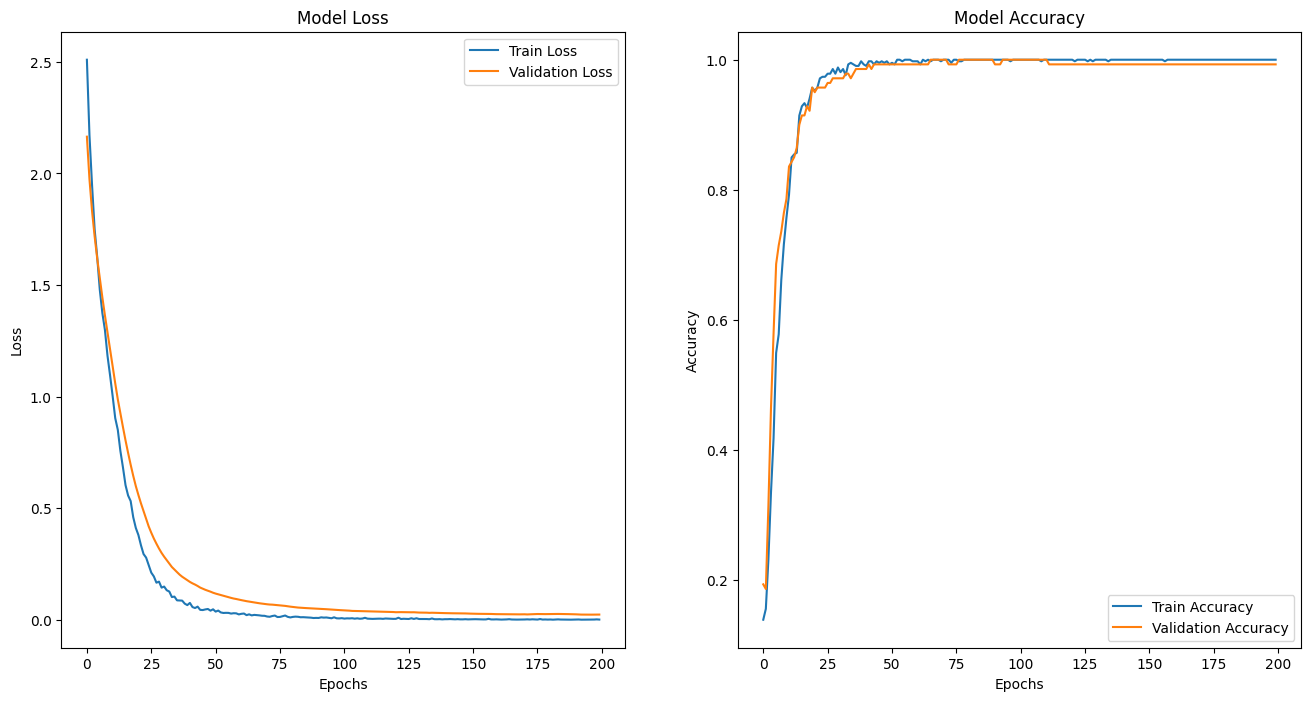

In [209]:
plot_history(history)

In [210]:
import tensorflow as tf

In [211]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

5/5 [==============================] - 0s 4ms/step
test_acc : 0.9928571428571429
test_loss : 0.030147991754508892
precision : 0.9932539682539682
recall : 0.9928571428571429
f1score : 0.992872075659532



Leave one out CV : CY

In [212]:
df_train = df[df['user'] != 'cy']
df_test = df[df['user'] == 'cy']

In [213]:
df_train.shape, df_test.shape

((207825, 16), (52500, 16))

In [214]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

<ipython-input-214-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-214-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-214-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

-0.10834750390953928 0.2883518055835892
-0.0026438108985925666 0.15959229690022456
0.9279860459521231 0.2989187424323345
0.4340312281968002 36.6192748320203
0.3633099001563816 97.2836028533875
-0.444280572597137 23.470774884392107
0.08794095994225914 0.49412097901325264
-0.5345861181282329 0.348103350140686
-0.6775972091904245 0.4872060585599941
2.933920943101167 99.05630840664257
2.6401902081077835 107.79553457190887
0.04197271743053062 61.01603172433604


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,...,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00
mean,3.01,50.52,-0.11,-0.00,0.93,0.43,0.36,-0.44,0.09,-0.53,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,2.01,28.91,0.29,0.16,0.30,36.62,97.28,23.47,0.49,0.35,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-3.03,-1.85,-1.82,-401.31,-942.69,-265.38,-4.00,-4.00,...,-9.19,-10.97,-9.69,-11.29,-8.27,-9.96,-6.82,-12.26,-9.95,-19.86
25%,1.00,25.00,-0.24,-0.11,0.96,-3.48,-6.65,-2.69,-0.14,-0.71,...,0.11,-0.11,-0.07,-0.10,-0.46,-0.50,-0.37,-0.11,-0.12,-0.14
50%,3.00,51.00,-0.10,-0.03,0.99,0.49,0.06,-0.06,0.06,-0.58,...,0.21,0.00,-0.00,0.02,-0.06,-0.13,-0.17,-0.01,-0.01,-0.03
75%,5.00,76.00,0.07,0.08,1.01,4.46,5.25,1.89,0.32,-0.38,...,0.27,0.11,0.05,0.10,0.47,0.44,0.22,0.12,0.09,0.13
max,6.00,100.00,3.70,1.21,3.72,398.86,1035.52,285.16,4.00,4.00,...,9.34,10.88,10.64,12.17,7.92,13.03,9.60,9.96,11.45,9.43


In [215]:
meanscale_by_col

{'Ax': [-0.10834750390953928, 0.2883518055835892],
 'Ay': [-0.0026438108985925666, 0.15959229690022456],
 'Az': [0.9279860459521231, 0.2989187424323345],
 'Gx': [0.4340312281968002, 36.6192748320203],
 'Gy': [0.3633099001563816, 97.2836028533875],
 'Gz': [-0.444280572597137, 23.470774884392107],
 'AEx': [0.08794095994225914, 0.49412097901325264],
 'AEy': [-0.5345861181282329, 0.348103350140686],
 'AEz': [-0.6775972091904245, 0.4872060585599941],
 'GEx': [2.933920943101167, 99.05630840664257],
 'GEy': [2.6401902081077835, 107.79553457190887],
 'GEz': [0.04197271743053062, 61.01603172433604]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [216]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [231]:
train_ids = df_train['unique_id'].unique()
test_ids = df_test['unique_id'].unique()

In [232]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[ 3.06387899e-01,  1.65660308e-02,  4.01913709e-02,
         -9.83471994e-01, -5.70837195e-02, -4.43773990e-01,
          4.69640128e-01,  6.73897904e-01,  4.05572151e-01,
         -4.99102079e-02,  6.28317398e-01,  7.64520831e-01],
        [ 4.45107336e-01,  1.41885363e-01, -2.27439890e-01,
         -1.10526578e+00,  1.09850887e-01, -4.43773990e-01,
          1.86308706e-01,  7.02625005e-01,  4.05572151e-01,
         -2.69886102e-01,  4.23949007e-01,  5.03441906e-01],
        [ 4.45107336e-01,  3.92524026e-01, -5.28525059e-01,
         -1.42012728e+00,  2.87989849e-01, -3.68361056e-01,
          2.67260541e-01,  8.17533408e-01,  5.08198133e-01,
         -4.03042689e-01,  2.32011557e-01,  4.07401573e-01],
        [ 7.91905927e-01,  7.05822355e-01, -5.95432874e-01,
         -1.52034773e+00,  4.22853275e-01, -3.29589435e-01,
          3.68450335e-01,  7.88806307e-01,  3.02946169e-01,
         -5.61942211e-01,  1.87297274e-01,  4.58535675e-01],
        [ 1.20806424e+00,  8.9380135

In [233]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-1.09770411e-01, -6.72690294e-01,  2.40914817e-01,
          3.96402409e-01,  3.75260466e-01, -7.42869356e-01,
         -1.33153820e+00,  1.27716702e+00,  4.26097347e-01,
         -5.41650722e-01,  2.44999108e-01,  3.80359499e-01],
        [ 7.22546209e-01, -2.96732299e-01,  3.07822632e-01,
          5.16557711e-01,  3.28798371e-01, -6.12920515e-01,
         -7.04161480e-01,  1.07607731e+00,  4.67147740e-01,
         -9.90183488e-01, -2.23202105e-01, -1.89818518e-01],
        [ 8.61265645e-01, -6.10030628e-01,  3.07822632e-01,
          7.69976164e-01,  8.15830198e-02, -1.60442910e-01,
         -6.43447604e-01,  6.45170804e-01,  5.28723329e-01,
         -1.40863235e+00, -5.88430592e-01, -5.51854517e-01],
        [ 6.18506631e-01, -7.98009626e-01,  3.07822632e-01,
          7.03071508e-01, -9.71726953e-02, -3.63248315e-01,
         -3.19640264e-01, -5.03913225e-01,  4.46622544e-01,
         -1.36673699e+00, -1.45868928e+00, -1.06598169e+00],
        [ 6.18506631e-01, -1.0486482

In [234]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2771, 75, 12), (700, 75, 12))

In [235]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [220]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [236]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [237]:
Y_train_valid.shape, Y_test.shape

((2771, 7), (700, 7))

In [238]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2078    X valid length: 693
y train length: 2078    y valid length: 693
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_19 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_9 (Dropout)         (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 34, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1088)              0         
                                                    

In [239]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [240]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [241]:
X_train.shape, X_valid.shape, X_test.shape

((2078, 75, 1, 12), (693, 75, 1, 12), (700, 75, 1, 12))

In [242]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
65/65 [==============================] - 2s 19ms/step - loss: 2.1022 - accuracy: 0.1853 - val_loss: 1.7196 - val_accuracy: 0.2987
Epoch 2/200
65/65 [==============================] - 1s 15ms/step - loss: 1.6432 - accuracy: 0.3648 - val_loss: 1.4908 - val_accuracy: 0.5527
Epoch 3/200
65/65 [==============================] - 1s 17ms/step - loss: 1.3712 - accuracy: 0.5173 - val_loss: 1.2933 - val_accuracy: 0.6595
Epoch 4/200
65/65 [==============================] - 1s 18ms/step - loss: 1.1464 - accuracy: 0.6357 - val_loss: 1.1096 - val_accuracy: 0.7258
Epoch 5/200
65/65 [==============================] - 1s 10ms/step - loss: 0.9522 - accuracy: 0.7012 - val_loss: 0.9582 - val_accuracy: 0.7807
Epoch 6/200
65/65 [==============================] - 1s 9ms/step - loss: 0.8296 - accuracy: 0.7454 - val_loss: 0.8316 - val_accuracy: 0.8167
Epoch 7/200
65/65 [==============================] - 1s 10ms/step - loss: 0.6974 - accuracy: 0.7897 - val_loss: 0.7292 - val_accuracy: 0.8369
Epoch 8

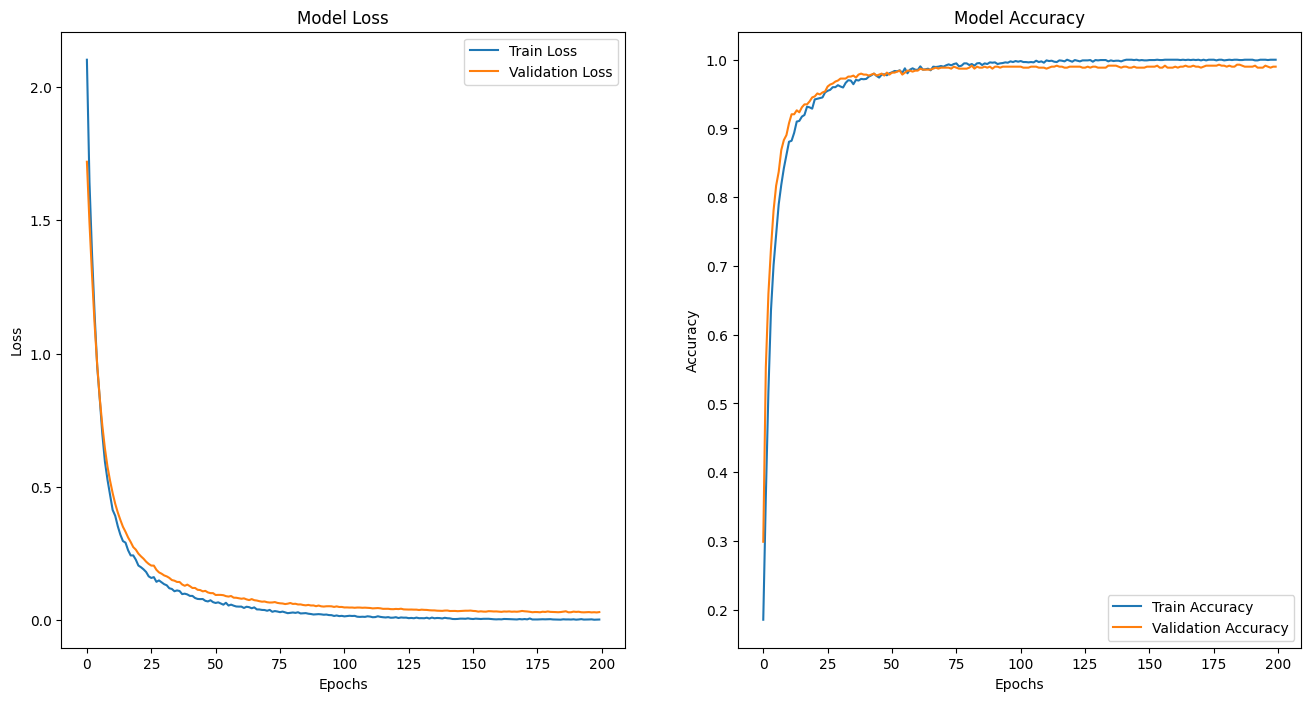

In [243]:
plot_history(history)

In [244]:
import tensorflow as tf

In [245]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

22/22 [==============================] - 0s 4ms/step
test_acc : 0.68
test_loss : 2.78592903620608
precision : 0.6165328000462402
recall : 0.68
f1score : 0.6209610826143008



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Leave one out CV : SY

In [246]:
df_train = df[df['user'] != 'sy']
df_test = df[df['user'] == 'sy']

In [247]:
df_train.shape, df_test.shape

((207825, 16), (52500, 16))

In [248]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.12717959821965596 0.26494685758904174
-0.003520702514134492 0.17259075457785134
0.9248246361121134 0.3113300789557856


<ipython-input-248-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-248-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-248-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0.5853603753157705 41.18126358637041


<ipython-input-248-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-248-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-248-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0.44391882593528204 97.19606701322024
-0.352185011427884 25.095142490140184
0.06657134608444604 0.49070084033353184
-0.5551517382413087 0.324938692752282
-0.680143293636473 0.4739315862857465
3.260669216889209 96.39740074687886
2.689208179959101 111.23679638438952
0.04983644893540243 66.98922340758122


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,...,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00
mean,3.01,50.52,-0.13,-0.00,0.92,0.59,0.44,-0.35,0.07,-0.56,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,2.01,28.91,0.26,0.17,0.31,41.18,97.20,25.10,0.49,0.32,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-3.03,-1.85,-1.82,-401.31,-942.69,-265.38,-4.00,-4.00,...,-8.82,-9.76,-9.70,-10.56,-8.29,-10.60,-7.00,-12.61,-9.64,-18.09
25%,1.00,25.00,-0.23,-0.12,0.96,-3.78,-6.41,-3.05,-0.15,-0.70,...,0.11,-0.11,-0.07,-0.11,-0.44,-0.45,-0.36,-0.11,-0.11,-0.14
50%,3.00,51.00,-0.11,-0.04,0.99,0.49,0.06,0.00,0.05,-0.58,...,0.21,-0.00,-0.00,0.01,-0.03,-0.08,-0.15,-0.01,-0.01,-0.03
75%,5.00,76.00,-0.02,0.08,1.01,4.88,5.25,2.32,0.27,-0.44,...,0.27,0.10,0.05,0.11,0.41,0.35,0.17,0.09,0.09,0.11
max,6.00,100.00,3.70,1.34,3.72,476.26,1035.52,285.16,4.00,4.00,...,8.98,11.55,10.65,11.38,8.02,14.02,9.88,10.23,13.28,11.18


In [249]:
meanscale_by_col

{'Ax': [-0.12717959821965596, 0.26494685758904174],
 'Ay': [-0.003520702514134492, 0.17259075457785134],
 'Az': [0.9248246361121134, 0.3113300789557856],
 'Gx': [0.5853603753157705, 41.18126358637041],
 'Gy': [0.44391882593528204, 97.19606701322024],
 'Gz': [-0.352185011427884, 25.095142490140184],
 'AEx': [0.06657134608444604, 0.49070084033353184],
 'AEy': [-0.5551517382413087, 0.324938692752282],
 'AEz': [-0.680143293636473, 0.4739315862857465],
 'GEx': [3.260669216889209, 96.39740074687886],
 'GEy': [2.689208179959101, 111.23679638438952],
 'GEz': [0.04983644893540243, 66.98922340758122]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [250]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [251]:
train_ids = df_train['unique_id'].unique()
test_ids = df_test['unique_id'].unique()

In [252]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-4.83885784e-02, -6.16946706e-01,  2.41465149e-01,
          3.48814931e-01,  3.74769086e-01, -6.98454492e-01,
         -1.29726973e+00,  1.43150615e+00,  4.43404280e-01,
         -5.59980547e-01,  2.36979063e-01,  3.46326803e-01],
        [ 8.57453454e-01, -2.69303519e-01,  3.05705649e-01,
          4.55659637e-01,  3.28265146e-01, -5.76917027e-01,
         -6.65520250e-01,  1.21608090e+00,  4.85604463e-01,
         -1.02088509e+00, -2.16737707e-01, -1.73010461e-01],
        [ 1.00842713e+00, -5.59006175e-01,  3.05705649e-01,
          6.81004835e-01,  8.08271509e-02, -1.53727559e-01,
         -6.04383204e-01,  7.54455359e-01,  5.48904739e-01,
         -1.45087594e+00, -5.70667353e-01, -5.02764993e-01],
        [ 7.44223200e-01, -7.32827768e-01,  3.05705649e-01,
          6.21511760e-01, -9.80895536e-02, -3.43405701e-01,
         -2.78318957e-01, -4.76546085e-01,  4.64504372e-01,
         -1.40782498e+00, -1.41400340e+00, -9.71049269e-01],
        [ 7.44223200e-01, -9.6458989

In [253]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[ 4.04532438e-01,  2.03991374e-02,  4.87436483e-02,
         -8.78199385e-01, -5.79644732e-02, -4.18719081e-01,
          5.16462645e-01,  7.85230396e-01,  4.22304188e-01,
         -5.46764661e-02,  6.08438880e-01,  6.96233830e-01],
        [ 5.55506110e-01,  1.36280200e-01, -2.08218352e-01,
         -9.86501065e-01,  1.09120477e-01, -4.18719081e-01,
          2.31156429e-01,  8.16005432e-01,  4.22304188e-01,
         -2.80719905e-01,  4.10392903e-01,  4.58434387e-01],
        [ 5.55506110e-01,  3.68042325e-01, -4.97300603e-01,
         -1.26648276e+00,  2.87419872e-01, -3.48187503e-01,
          3.12672491e-01,  9.39105576e-01,  5.27804647e-01,
         -4.17549321e-01,  2.24393300e-01,  3.70957630e-01],
        [ 9.32940290e-01,  6.57744981e-01, -5.61541104e-01,
         -1.35560096e+00,  4.22404758e-01, -3.11925505e-01,
          4.14567568e-01,  9.08330540e-01,  3.16803729e-01,
         -5.80831732e-01,  1.81062315e-01,  4.17532285e-01],
        [ 1.38586131e+00,  8.3156657

In [254]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2771, 75, 12), (700, 75, 12))

In [255]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [256]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [257]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [258]:
Y_train_valid.shape, Y_test.shape

((2771, 7), (700, 7))

In [259]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2078    X valid length: 693
y train length: 2078    y valid length: 693
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_10 (Dropout)        (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 34, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 1088)              0         
                                                   

In [260]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [261]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [262]:
X_train.shape, X_valid.shape, X_test.shape

((2078, 75, 1, 12), (693, 75, 1, 12), (700, 75, 1, 12))

In [263]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
65/65 [==============================] - 3s 20ms/step - loss: 1.9932 - accuracy: 0.2084 - val_loss: 1.6974 - val_accuracy: 0.3391
Epoch 2/200
65/65 [==============================] - 1s 15ms/step - loss: 1.6161 - accuracy: 0.3638 - val_loss: 1.4665 - val_accuracy: 0.5498
Epoch 3/200
65/65 [==============================] - 1s 11ms/step - loss: 1.3482 - accuracy: 0.5433 - val_loss: 1.2463 - val_accuracy: 0.6768
Epoch 4/200
65/65 [==============================] - 1s 9ms/step - loss: 1.1011 - accuracy: 0.6598 - val_loss: 1.0483 - val_accuracy: 0.7778
Epoch 5/200
65/65 [==============================] - 1s 11ms/step - loss: 0.9044 - accuracy: 0.7267 - val_loss: 0.8794 - val_accuracy: 0.8268
Epoch 6/200
65/65 [==============================] - 1s 9ms/step - loss: 0.7245 - accuracy: 0.7907 - val_loss: 0.7441 - val_accuracy: 0.8773
Epoch 7/200
65/65 [==============================] - 1s 11ms/step - loss: 0.6109 - accuracy: 0.8354 - val_loss: 0.6360 - val_accuracy: 0.9062
Epoch 8/

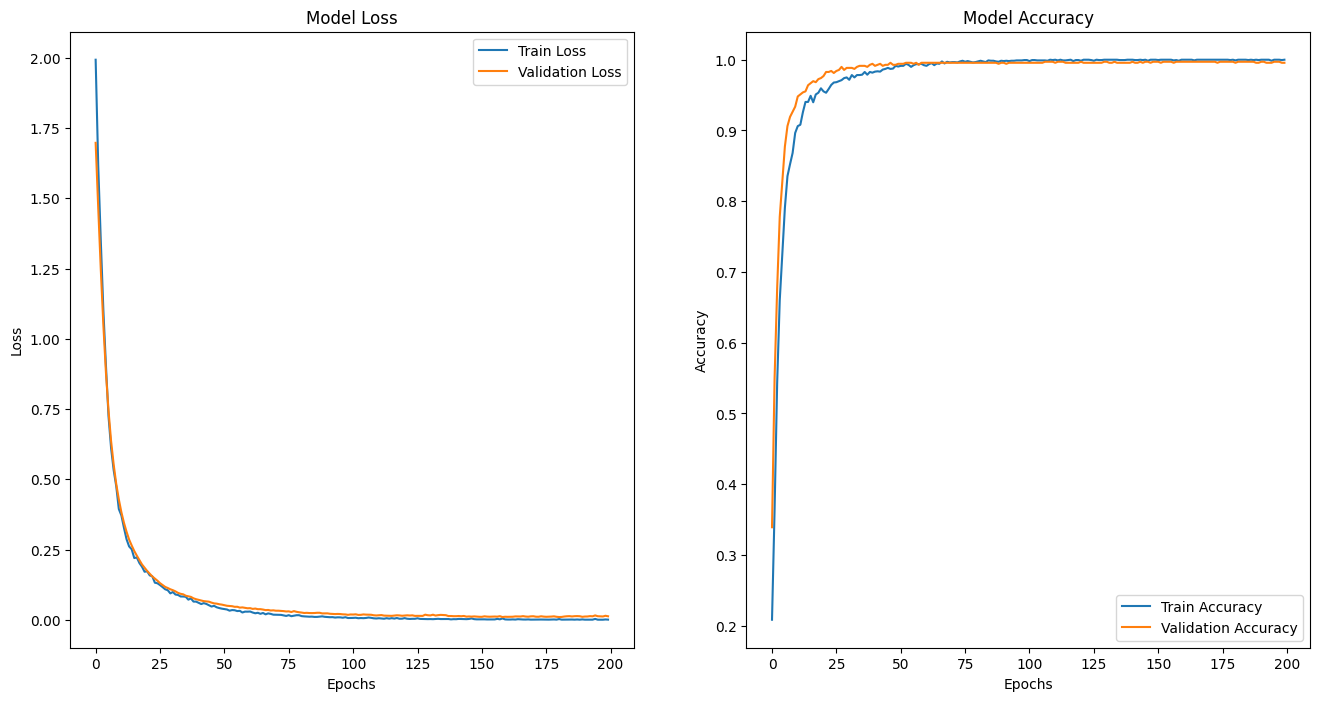

In [264]:
plot_history(history)

In [265]:
import tensorflow as tf

In [266]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

22/22 [==============================] - 0s 4ms/step
test_acc : 0.3442857142857143
test_loss : 5.288388217232437
precision : 0.46170686456400745
recall : 0.3442857142857143
f1score : 0.29574590399540096



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Leave one out CV : MJ

In [267]:
df_train = df[df['user'] != 'mj']
df_test = df[df['user'] == 'mj']

In [268]:
df_train.shape, df_test.shape

((210000, 16), (50325, 16))

In [269]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

<ipython-input-269-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-269-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])


-0.056766523809523815 0.28520574922962266
-0.026766666666666675 0.1411218346756526


<ipython-input-269-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-269-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-269-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0.9342681904761905 0.30244049186821453
0.45719319047619056 35.96754682082184
0.3384707142857143 95.51162613515572
-0.451199238095238 22.39755346260835
0.14295319047619046 0.49484858588433456
-0.5231341428571428 0.33128714419738026
-0.679939238095238 0.4906428544203056
3.0853607142857133 94.3751265663453
2.669121380952381 111.40128486840429
0.43289338095238095 66.00855057365324


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,210000.0,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,...,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00,210000.00
mean,3.0,50.50,-0.06,-0.03,0.93,0.46,0.34,-0.45,0.14,-0.52,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,2.0,28.87,0.29,0.14,0.30,35.97,95.51,22.40,0.49,0.33,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.0,1.00,-3.03,-1.85,-1.72,-337.52,-870.30,-260.13,-4.00,-4.00,...,-8.78,-9.40,-9.12,-11.59,-8.37,-10.50,-6.77,-11.44,-9.63,-11.58
25%,1.0,25.75,-0.15,-0.11,0.98,-3.66,-6.10,-2.56,-0.09,-0.68,...,0.15,-0.11,-0.07,-0.09,-0.47,-0.47,-0.39,-0.12,-0.12,-0.13
50%,3.0,50.50,-0.05,-0.04,1.00,0.49,0.06,0.00,0.16,-0.55,...,0.22,0.00,-0.00,0.02,0.03,-0.08,-0.16,-0.01,-0.01,-0.03
75%,5.0,75.25,0.11,0.03,1.01,4.39,5.07,2.01,0.35,-0.37,...,0.25,0.11,0.05,0.11,0.42,0.46,0.16,0.11,0.09,0.10
max,6.0,100.00,3.70,1.34,3.72,476.26,829.96,257.93,4.00,4.00,...,9.21,13.23,8.69,11.54,7.79,13.65,9.54,10.45,13.26,11.34


In [270]:
meanscale_by_col

{'Ax': [-0.056766523809523815, 0.28520574922962266],
 'Ay': [-0.026766666666666675, 0.1411218346756526],
 'Az': [0.9342681904761905, 0.30244049186821453],
 'Gx': [0.45719319047619056, 35.96754682082184],
 'Gy': [0.3384707142857143, 95.51162613515572],
 'Gz': [-0.451199238095238, 22.39755346260835],
 'AEx': [0.14295319047619046, 0.49484858588433456],
 'AEy': [-0.5231341428571428, 0.33128714419738026],
 'AEz': [-0.679939238095238, 0.4906428544203056],
 'GEx': [3.0853607142857133, 94.3751265663453],
 'GEy': [2.669121380952381, 111.40128486840429],
 'GEz': [0.43289338095238095, 66.00855057365324]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [271]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [272]:
train_ids = df_train['unique_id'].unique()
test_ids = df_test['unique_id'].unique()

In [273]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-2.91836600e-01, -5.89797699e-01,  2.17337993e-01,
          4.02941209e-01,  3.82482539e-01, -7.78156453e-01,
         -1.44075018e+00,  1.30742816e+00,  4.27886061e-01,
         -5.70122263e-01,  2.36809465e-01,  3.45668954e-01],
        [ 5.49661163e-01, -1.64633158e-01,  2.83466704e-01,
          5.25273711e-01,  3.35158457e-01, -6.41980866e-01,
         -8.14295932e-01,  1.09613110e+00,  4.68648908e-01,
         -1.04090309e+00, -2.16237375e-01, -1.81383976e-01],
        [ 6.89910790e-01, -5.18936942e-01,  2.83466704e-01,
          7.83284080e-01,  8.33566510e-02, -1.67821935e-01,
         -7.53671327e-01,  6.43351686e-01,  5.29793180e-01,
         -1.48010780e+00, -5.69644430e-01, -5.16037590e-01],
        [ 4.44473943e-01, -7.31519212e-01,  2.83466704e-01,
          7.15167118e-01, -9.87154245e-02, -3.80345147e-01,
         -4.30340101e-01, -5.64060092e-01,  4.48267484e-01,
         -1.43613435e+00, -1.41173526e+00, -9.91279051e-01],
        [ 4.44473943e-01, -1.0149622

In [274]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-5.37273448e-01, -1.58184829e+00,  8.50805703e-02,
         -3.09645616e-01, -2.93037318e-01,  1.44797954e+00,
          7.41735593e-01, -5.03689503e-01, -1.42793809e-01,
          4.27174413e-01, -4.82571825e-01, -1.41486054e+00],
        [-5.37273448e-01, -1.58184829e+00,  8.50805703e-02,
         -8.79881893e-01, -4.08101844e-01,  1.20286349e+00,
          8.42776602e-01, -2.62207148e-01, -1.23841414e-04,
          2.29240904e-01, -4.16235068e-01, -1.37047235e+00],
        [-7.47647888e-01, -1.15668375e+00,  1.89518589e-02,
         -1.09535391e+00, -4.31030989e-01,  8.59522415e-01,
          6.40694585e-01, -1.41465970e-01, -1.23841414e-04,
          7.33735629e-02, -3.43345424e-01, -1.14110813e+00],
        [-1.09827196e+00, -8.02379969e-01, -1.41124968e-02,
         -1.10035843e+00, -3.33241847e-01,  5.67972714e-01,
          1.20652423e+00,  2.20757564e-01,  2.64834669e-01,
          2.40260756e-01, -2.72699919e-01, -7.87820562e-01],
        [-1.30864640e+00, -5.8979769

In [275]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2800, 75, 12), (671, 75, 12))

In [276]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [277]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [278]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [279]:
Y_train_valid.shape, Y_test.shape

((2800, 7), (671, 7))

In [280]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2100    X valid length: 700
y train length: 2100    y valid length: 700
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_23 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_11 (Dropout)        (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 34, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1088)              0         
                                                   

In [281]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [282]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [283]:
X_train.shape, X_valid.shape, X_test.shape

((2100, 75, 1, 12), (700, 75, 1, 12), (671, 75, 1, 12))

In [284]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
66/66 [==============================] - 2s 12ms/step - loss: 2.0105 - accuracy: 0.1829 - val_loss: 1.6799 - val_accuracy: 0.3529
Epoch 2/200
66/66 [==============================] - 1s 11ms/step - loss: 1.5808 - accuracy: 0.3843 - val_loss: 1.4477 - val_accuracy: 0.5614
Epoch 3/200
66/66 [==============================] - 1s 10ms/step - loss: 1.3219 - accuracy: 0.5748 - val_loss: 1.2554 - val_accuracy: 0.7086
Epoch 4/200
66/66 [==============================] - 1s 9ms/step - loss: 1.1051 - accuracy: 0.6738 - val_loss: 1.0816 - val_accuracy: 0.7757
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 0.9306 - accuracy: 0.7300 - val_loss: 0.9370 - val_accuracy: 0.8000
Epoch 6/200
66/66 [==============================] - 1s 9ms/step - loss: 0.7794 - accuracy: 0.7676 - val_loss: 0.8242 - val_accuracy: 0.8300
Epoch 7/200
66/66 [==============================] - 1s 11ms/step - loss: 0.6769 - accuracy: 0.8029 - val_loss: 0.7311 - val_accuracy: 0.8657
Epoch 8/2

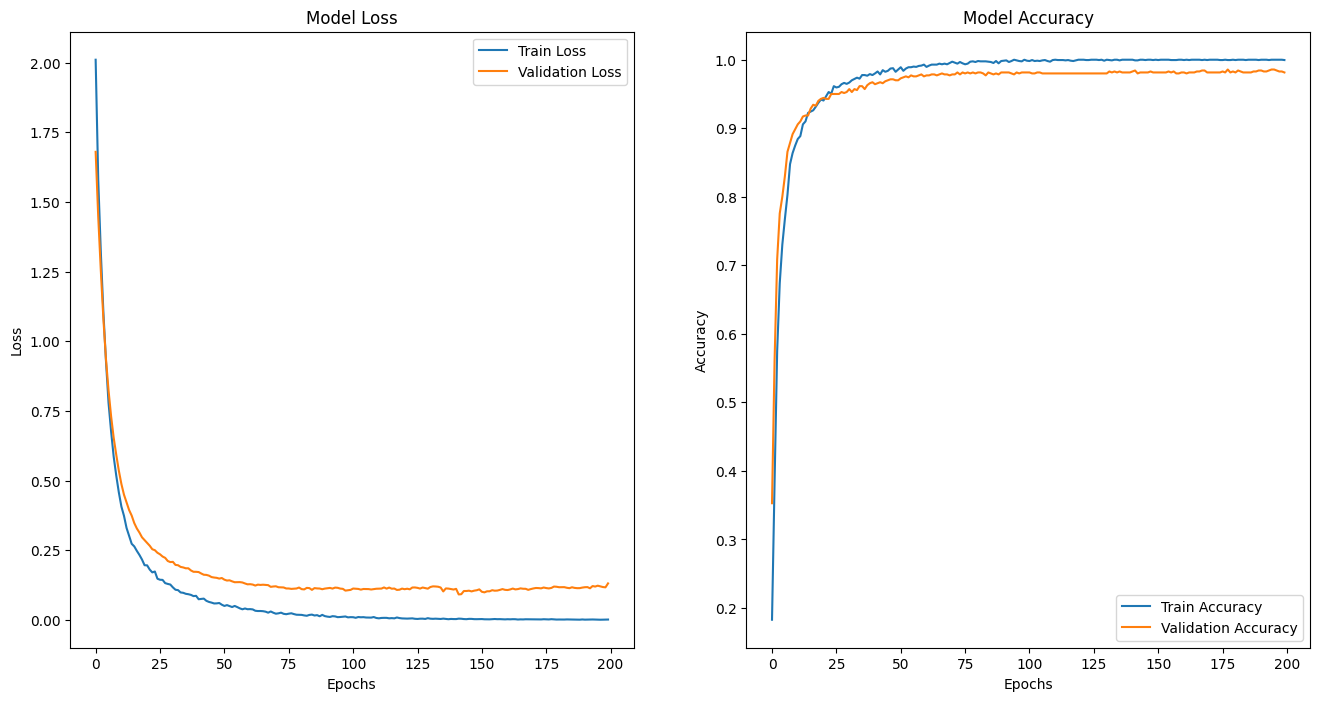

In [285]:
plot_history(history)

In [286]:
import tensorflow as tf

In [287]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

21/21 [==============================] - 0s 5ms/step
test_acc : 0.5081967213114754
test_loss : 4.554437720396504
precision : 0.6011716187080819
recall : 0.5081967213114754
f1score : 0.4374421432898695



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Leave one out CV : DH

In [288]:
df_train = df[df['user'] != 'dh']
df_test = df[df['user'] == 'dh']

In [289]:
df_train.shape, df_test.shape

((207825, 16), (52500, 16))

In [290]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

<ipython-input-290-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-290-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-290-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

-0.09823712257909299 0.26950306135975044
-0.0006506435703115584 0.1628281183531743


<ipython-input-290-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-290-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-290-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

0.9279430771081438 0.3012184703082071
0.5717253939612655 36.77912788846815
0.33640081799590993 94.38406700191011
-0.17493814507398056 21.73126808056569
0.1747292674124865 0.4510497169823432
-0.5181217851557801 0.3244715257118868
-0.690269265006616 0.4759935927195046
2.831470612293997 89.67541718327026
2.87005783712258 107.11315623246577
0.38469866474197056 65.3235702971811


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,...,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00
mean,3.01,50.52,-0.10,-0.00,0.93,0.57,0.34,-0.17,0.17,-0.52,...,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,2.01,28.91,0.27,0.16,0.30,36.78,94.38,21.73,0.45,0.32,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-2.95,-1.63,-1.82,-401.31,-942.69,-265.38,-4.00,-4.00,...,-9.12,-10.93,-9.99,-12.20,-9.26,-10.73,-6.95,-13.55,-9.33,-18.55
25%,1.00,25.00,-0.22,-0.10,0.96,-3.66,-6.23,-2.56,-0.04,-0.67,...,0.11,-0.12,-0.07,-0.11,-0.48,-0.47,-0.40,-0.13,-0.13,-0.14
50%,3.00,51.00,-0.07,-0.03,1.00,0.49,0.06,0.00,0.18,-0.56,...,0.24,-0.00,-0.00,0.01,0.01,-0.13,-0.15,-0.01,-0.01,-0.03
75%,5.00,76.00,0.06,0.07,1.01,4.58,5.07,2.14,0.37,-0.37,...,0.27,0.11,0.05,0.11,0.43,0.46,0.19,0.13,0.09,0.11
max,6.00,100.00,3.56,1.34,3.72,476.26,1035.52,285.16,4.00,3.99,...,9.27,12.93,10.97,13.13,8.48,13.89,9.85,9.11,13.79,11.46


In [291]:
meanscale_by_col

{'Ax': [-0.09823712257909299, 0.26950306135975044],
 'Ay': [-0.0006506435703115584, 0.1628281183531743],
 'Az': [0.9279430771081438, 0.3012184703082071],
 'Gx': [0.5717253939612655, 36.77912788846815],
 'Gy': [0.33640081799590993, 94.38406700191011],
 'Gz': [-0.17493814507398056, 21.73126808056569],
 'AEx': [0.1747292674124865, 0.4510497169823432],
 'AEy': [-0.5181217851557801, 0.3244715257118868],
 'AEz': [-0.690269265006616, 0.4759935927195046],
 'GEx': [2.831470612293997, 89.67541718327026],
 'GEy': [2.87005783712258, 107.11315623246577],
 'GEz': [0.38469866474197056, 65.3235702971811]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [292]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [293]:
train_ids = df_train['unique_id'].unique()
test_ids = df_test['unique_id'].unique()

In [294]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-1.54962534e-01, -6.71563103e-01,  2.39218142e-01,
          3.90935714e-01,  3.87073797e-01, -8.14727506e-01,
         -1.65110239e+00,  1.31944331e+00,  4.62756786e-01,
         -5.97170019e-01,  2.44413880e-01,  3.50031409e-01],
        [ 7.35565383e-01, -3.03076379e-01,  3.05615133e-01,
          5.10568784e-01,  3.39184358e-01, -6.74376746e-01,
         -9.63816739e-01,  1.10370790e+00,  5.04774158e-01,
         -1.09262353e+00, -2.26770069e-01, -1.82548177e-01],
        [ 8.83986703e-01, -6.10148649e-01,  3.05615133e-01,
          7.62885806e-01,  8.43744017e-02, -1.85680000e-01,
         -8.97305224e-01,  6.41417717e-01,  5.67800217e-01,
         -1.55484608e+00, -5.94325292e-01, -5.20710955e-01],
        [ 6.24249393e-01, -7.94392011e-01,  3.05615133e-01,
          6.96271937e-01, -9.98727976e-02, -4.04719219e-01,
         -5.42577144e-01, -5.91356096e-01,  4.83765472e-01,
         -1.50856807e+00, -1.47012807e+00, -1.00093578e+00],
        [ 6.24249393e-01, -1.0400498

In [295]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-4.14699844e-01, -1.80247470e-01,  2.06019647e-01,
         -1.06507527e-02, -1.22546116e-01, -7.89213887e-02,
         -4.98236134e-01, -3.44801334e-01, -1.88512485e-01,
         -1.66318782e-02, -7.74886870e-02,  3.05448910e-02],
        [-1.54962534e-01, -1.80247470e-01,  2.72416638e-01,
         -5.19785406e-02, -8.11196324e-02, -3.98072423e-02,
         -5.20406639e-01, -3.44801334e-01, -1.88512485e-01,
         -1.79700375e-02, -5.98437957e-02,  4.46286283e-02],
        [-2.66278524e-01, -1.80247470e-01,  2.39218142e-01,
         -4.21903803e-02, -1.02521550e-01,  1.63330618e-02,
         -4.76065629e-01, -3.44801334e-01, -1.67503799e-01,
         -1.79700375e-02, -4.27590597e-02,  7.12302364e-03],
        [-3.03383854e-01, -1.80247470e-01,  2.06019647e-01,
         -2.39735264e-02, -8.44040850e-02,  1.63330618e-02,
         -5.20406639e-01, -3.44801334e-01, -1.67503799e-01,
         -1.79700375e-02, -2.90352553e-02, -1.06347320e-02],
        [-2.66278524e-01, -2.4166192

In [296]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2771, 75, 12), (700, 75, 12))

In [297]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [298]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [299]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [300]:
Y_train_valid.shape, Y_test.shape

((2771, 7), (700, 7))

In [301]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2078    X valid length: 693
y train length: 2078    y valid length: 693
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_25 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_12 (Dropout)        (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 34, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 1088)              0         
                                                   

In [302]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [303]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [304]:
X_train.shape, X_valid.shape, X_test.shape

((2078, 75, 1, 12), (693, 75, 1, 12), (700, 75, 1, 12))

In [305]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
65/65 [==============================] - 2s 19ms/step - loss: 2.0019 - accuracy: 0.1728 - val_loss: 1.7587 - val_accuracy: 0.2698
Epoch 2/200
65/65 [==============================] - 1s 14ms/step - loss: 1.6924 - accuracy: 0.3104 - val_loss: 1.5845 - val_accuracy: 0.4286
Epoch 3/200
65/65 [==============================] - 1s 15ms/step - loss: 1.4667 - accuracy: 0.4625 - val_loss: 1.4254 - val_accuracy: 0.5671
Epoch 4/200
65/65 [==============================] - 1s 15ms/step - loss: 1.2791 - accuracy: 0.5650 - val_loss: 1.2670 - val_accuracy: 0.6667
Epoch 5/200
65/65 [==============================] - 1s 11ms/step - loss: 1.1081 - accuracy: 0.6578 - val_loss: 1.1101 - val_accuracy: 0.7518
Epoch 6/200
65/65 [==============================] - 1s 9ms/step - loss: 0.9190 - accuracy: 0.7430 - val_loss: 0.9645 - val_accuracy: 0.7994
Epoch 7/200
65/65 [==============================] - 1s 10ms/step - loss: 0.7873 - accuracy: 0.7815 - val_loss: 0.8382 - val_accuracy: 0.8470
Epoch 8

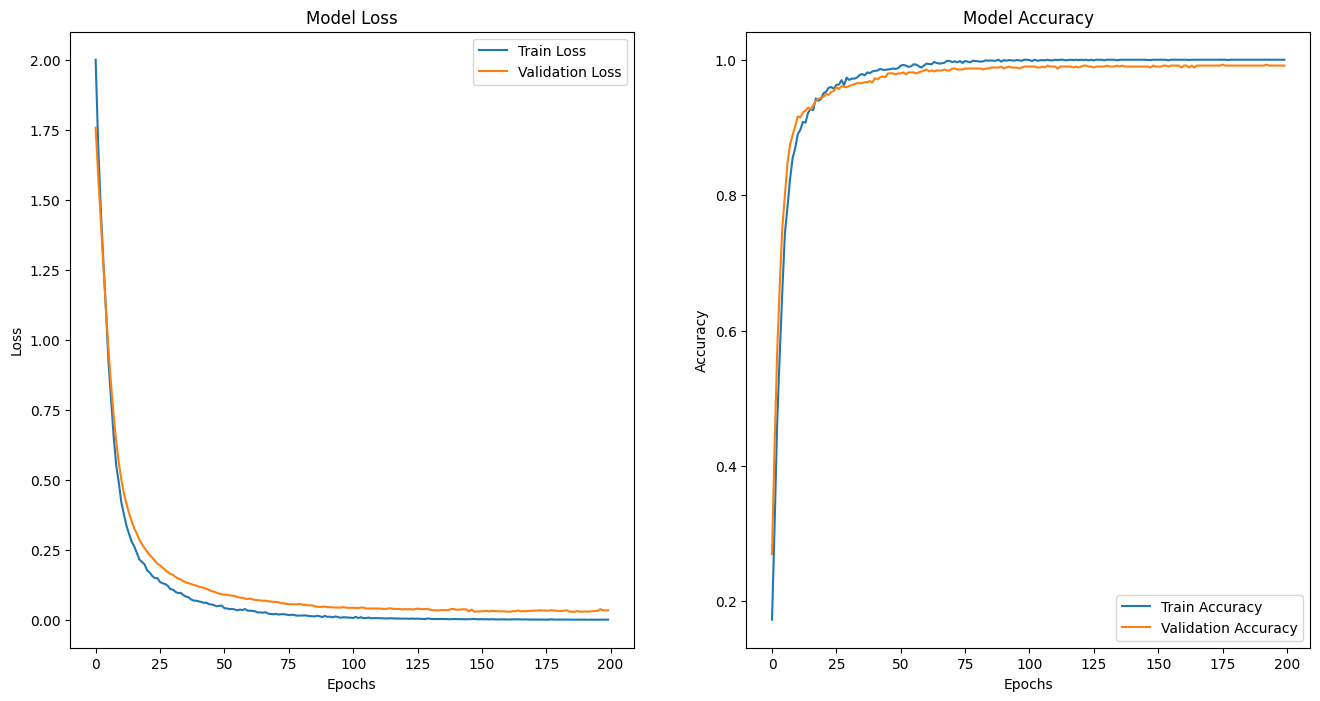

In [306]:
plot_history(history)

In [307]:
import tensorflow as tf

In [308]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

22/22 [==============================] - 1s 3ms/step
test_acc : 0.7228571428571429
test_loss : 1.5724081862486765
precision : 0.7039097939097939
recall : 0.7228571428571429
f1score : 0.6864400683277474



Leave one out CV : JH

In [309]:
df_train = df[df['user'] != 'jh']
df_test = df[df['user'] == 'jh']

In [310]:
df_train.shape, df_test.shape

((207825, 16), (52500, 16))

In [311]:
# #NORMALIZATION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

meanscale_by_col = dict()
for column in IMU_COLUMNS:
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
  print(ss.mean_[0], ss.scale_[0])
  meanscale_by_col[column] = [ss.mean_[0], ss.scale_[0]]
  df_test[column+'_ss'] = ss.transform(df_test[[column]])

df_train.describe().round(2)

-0.06817967039576565 0.2888926168472355
-0.02296008661133165 0.16624488066118875
0.9272434500180443 0.3051393777110508
0.4767727655479371 38.861414509296864
0.39323209431011674 100.12896661222729
-0.3799439913388669 23.848315302348837
0.1361545531095874 0.5026550462221799
-0.5365225550342837 0.34806011840889955


<ipython-input-311-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column+'_ss'] = ss.fit_transform(df_train[[column]])
<ipython-input-311-fee1dca23777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column+'_ss'] = ss.transform(df_test[[column]])
<ipython-input-311-fee1dca23777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

-0.6635793095152172 0.47630700508105717
3.2439735835438466 93.38473968706637
2.4344385901599903 111.93571749062859
0.012155178635871613 63.00747308491359


,gesture,id,Ax,Ay,Az,Gx,Gy,Gz,AEx,AEy,...,Az_ss,Gx_ss,Gy_ss,Gz_ss,AEx_ss,AEy_ss,AEz_ss,GEx_ss,GEy_ss,GEz_ss
count,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,...,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00,207825.00
mean,3.01,50.52,-0.07,-0.02,0.93,0.48,0.39,-0.38,0.14,-0.54,...,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,2.01,28.91,0.29,0.17,0.31,38.86,100.13,23.85,0.50,0.35,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,1.00,-3.03,-1.85,-1.82,-401.31,-942.69,-265.38,-4.00,-4.00,...,-9.00,-10.34,-9.42,-11.11,-8.23,-9.95,-7.00,-13.01,-9.58,-19.23
25%,1.00,25.00,-0.19,-0.12,0.96,-4.09,-6.29,-2.75,-0.09,-0.71,...,0.11,-0.12,-0.07,-0.10,-0.45,-0.50,-0.39,-0.12,-0.12,-0.14
50%,3.00,51.00,-0.05,-0.05,1.00,0.49,0.06,0.00,0.16,-0.57,...,0.24,0.00,-0.00,0.02,0.05,-0.10,-0.14,-0.02,-0.01,-0.03
75%,5.00,76.00,0.11,0.05,1.01,5.25,5.62,2.14,0.36,-0.39,...,0.27,0.12,0.05,0.11,0.45,0.42,0.18,0.12,0.10,0.12
max,6.00,100.00,3.70,1.34,3.27,476.26,1035.52,285.16,4.00,4.00,...,7.68,12.24,10.34,11.97,7.69,13.03,9.79,10.56,13.20,11.89


In [312]:
meanscale_by_col

{'Ax': [-0.06817967039576565, 0.2888926168472355],
 'Ay': [-0.02296008661133165, 0.16624488066118875],
 'Az': [0.9272434500180443, 0.3051393777110508],
 'Gx': [0.4767727655479371, 38.861414509296864],
 'Gy': [0.39323209431011674, 100.12896661222729],
 'Gz': [-0.3799439913388669, 23.848315302348837],
 'AEx': [0.1361545531095874, 0.5026550462221799],
 'AEy': [-0.5365225550342837, 0.34806011840889955],
 'AEz': [-0.6635793095152172, 0.47630700508105717],
 'GEx': [3.2439735835438466, 93.38473968706637],
 'GEy': [2.4344385901599903, 111.93571749062859],
 'GEz': [0.012155178635871613, 63.00747308491359]}

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [313]:
transformed_columns = [column + '_ss' for column in IMU_COLUMNS]
transformed_columns

['Ax_ss',
 'Ay_ss',
 'Az_ss',
 'Gx_ss',
 'Gy_ss',
 'Gz_ss',
 'AEx_ss',
 'AEy_ss',
 'AEz_ss',
 'GEx_ss',
 'GEy_ss',
 'GEz_ss']

In [314]:
train_ids = df_train['unique_id'].unique()
test_ids = df_test['unique_id'].unique()

In [315]:
import numpy as np
from scipy import stats
samples_train = []
samples_test = []
labels_train = []
labels_test = []


for train_id in train_ids:
  _df = df_train[df_train['unique_id'] == train_id]
  samples_train.append(_df[transformed_columns].to_numpy())
  labels_train.append(df_train[df_train['unique_id'] == train_id]['gesture'].iloc[0])

samples_train[0], labels_train[0]

(array([[-2.48605625e-01, -5.23564473e-01,  2.38437105e-01,
          3.72431817e-01,  3.64297856e-01, -7.33806803e-01,
         -1.40484923e+00,  1.28288917e+00,  4.06417095e-01,
         -5.77867152e-01,  2.37775413e-01,  3.68810931e-01],
        [ 5.82152885e-01, -1.62651104e-01,  3.03980924e-01,
          4.85654665e-01,  3.19156074e-01, -6.05915169e-01,
         -7.88124094e-01,  1.08177448e+00,  4.48406820e-01,
         -1.05364082e+00, -2.13108373e-01, -1.83345794e-01],
        [ 7.20612637e-01, -4.63412245e-01,  3.03980924e-01,
          7.24451943e-01,  7.89658395e-02, -1.60600695e-01,
         -7.28441017e-01,  6.50814451e-01,  5.11391407e-01,
         -1.49750349e+00, -5.64828100e-01, -5.33939127e-01],
        [ 4.78308071e-01, -6.43868930e-01,  3.03980924e-01,
          6.61407403e-01, -9.47101764e-02, -3.60195506e-01,
         -4.10131271e-01, -4.98412302e-01,  4.27411958e-01,
         -1.45306368e+00, -1.40289840e+00, -1.03181658e+00],
        [ 4.78308071e-01, -8.8447784

In [316]:
for test_id in test_ids:
  _df = df_test[df_test['unique_id'] == test_id]
  samples_test.append(_df[transformed_columns].to_numpy())
  labels_test.append(df_test[df_test['unique_id'] == test_id]['gesture'].iloc[0])

samples_test[0], labels_test[0]

(array([[-8.02444632e-01, -2.22803332e-01,  1.07349468e-01,
         -4.29147440e-03,  5.26089426e-03, -1.32506467e-01,
          1.32067797e+00, -4.98412302e-01, -6.22331159e-01,
          8.23049509e-02, -2.06764976e-02,  6.16876744e-01],
        [-8.37059570e-01, -1.62651104e-01,  7.45775591e-02,
         -9.07525578e-02, -1.55123152e-02, -5.82873881e-02,
          5.05009248e-01, -2.68566952e-01, -6.85315746e-01,
          5.02502085e-01,  2.55285462e-01,  6.63379164e-01],
        [-8.37059570e-01, -2.22803332e-01,  2.05665196e-01,
         -1.36299021e-01,  1.19522646e-02, -1.50537091e-01,
          7.03952839e-01, -9.61829385e-02, -3.70392811e-01,
          3.43054192e-01,  5.16417482e-01,  9.09381729e-01],
        [-6.63984880e-01, -1.62651104e-01,  2.05665196e-01,
         -2.30479844e-01,  3.69200645e-02, -3.19521774e-01,
         -1.91293321e-01, -9.99093197e-03, -1.39449325e-01,
          2.11662275e-01,  5.79132049e-01,  1.06920404e+00],
        [-7.67829694e-01, -1.0249887

In [317]:
# Dimensions of result tensor
np.array(samples_train).shape, np.array(samples_test).shape

((2771, 75, 12), (700, 75, 12))

In [318]:
X_train_valid = np.array(samples_train)
X_test = np.array(samples_test)

### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [319]:
#Labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(labels_train).reshape(-1, 1))

enc.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [320]:
Y_train_valid = enc.transform(np.array(labels_train).reshape(-1, 1)).toarray()
Y_test = enc.transform(np.array(labels_test).reshape(-1, 1)).toarray()

In [321]:
Y_train_valid.shape, Y_test.shape

((2771, 7), (700, 7))

In [322]:
train_accuracies = []
train_losses = []
valid_accuracies = []
valid_losses = []
precisions = []
recalls = []
f1_scores = []

models = []
histories = []

from sklearn.model_selection import train_test_split

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=10)


print(f"X train length: {len(X_train)}    X valid length: {len(X_valid)}")
print(f"y train length: {len(Y_train)}    y valid length: {len(Y_valid)}")

# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

model = create_model(n_timesteps,n_features,n_outputs)

X train length: 2078    X valid length: 693
y train length: 2078    y valid length: 693
n_timesteps: 75, n_features: 12, n_outputs: 7
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 72, 1, 32)         1568      
                                                                 
 conv2d_27 (Conv2D)          (None, 69, 1, 32)         4128      
                                                                 
 dropout_13 (Dropout)        (None, 69, 1, 32)         0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 34, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1088)              0         
                                                   

In [323]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1, X_valid.shape[2])

In [324]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, X_test.shape[2])

In [325]:
X_train.shape, X_valid.shape, X_test.shape

((2078, 75, 1, 12), (693, 75, 1, 12), (700, 75, 1, 12))

In [326]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
65/65 [==============================] - 2s 12ms/step - loss: 1.9829 - accuracy: 0.2045 - val_loss: 1.7679 - val_accuracy: 0.3189
Epoch 2/200
65/65 [==============================] - 1s 10ms/step - loss: 1.6858 - accuracy: 0.3494 - val_loss: 1.5862 - val_accuracy: 0.4646
Epoch 3/200
65/65 [==============================] - 1s 10ms/step - loss: 1.4576 - accuracy: 0.5077 - val_loss: 1.4047 - val_accuracy: 0.6263
Epoch 4/200
65/65 [==============================] - 1s 9ms/step - loss: 1.2154 - accuracy: 0.6155 - val_loss: 1.2148 - val_accuracy: 0.6984
Epoch 5/200
65/65 [==============================] - 1s 9ms/step - loss: 1.0162 - accuracy: 0.6829 - val_loss: 1.0424 - val_accuracy: 0.7460
Epoch 6/200
65/65 [==============================] - 1s 9ms/step - loss: 0.8382 - accuracy: 0.7353 - val_loss: 0.8992 - val_accuracy: 0.8038
Epoch 7/200
65/65 [==============================] - 1s 9ms/step - loss: 0.7179 - accuracy: 0.8008 - val_loss: 0.7821 - val_accuracy: 0.8543
Epoch 8/20

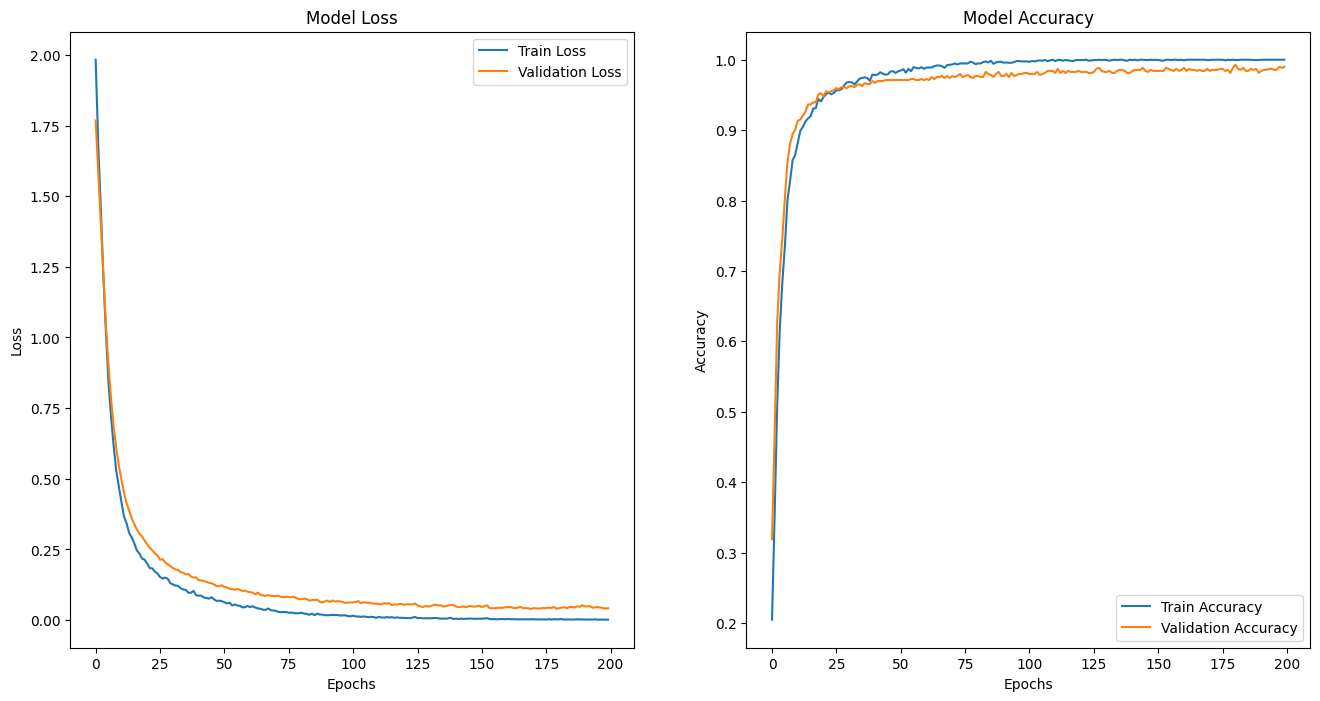

In [327]:
plot_history(history)

In [328]:
import tensorflow as tf

In [329]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

# test accuracy
Y_pred = model.predict(X_test)
Y_pred_flat = tf.argmax(Y_pred, axis=1)
Y_test_flat = tf.argmax(Y_test, axis=1)


test_acc = accuracy_score(Y_test_flat, Y_pred_flat)
test_loss = log_loss(Y_test_flat, Y_pred)
precision = precision_score(Y_test_flat, Y_pred_flat, average = 'weighted')
recall = recall_score(Y_test_flat, Y_pred_flat, average = 'weighted')
f1score = f1_score(Y_test_flat, Y_pred_flat, average = 'weighted')

print(
    f'test_acc : {test_acc}\n'
    f'test_loss : {test_loss}\n'
    f'precision : {precision}\n'
    f'recall : {recall}\n'
    f'f1score : {f1score}\n'
)

22/22 [==============================] - 0s 4ms/step
test_acc : 0.6985714285714286
test_loss : 1.5767700531651456
precision : 0.7326465942364
recall : 0.6985714285714286
f1score : 0.6812951529298409

